# Objetivo

En este trabajo vamos a tratar de implementar el modelo de evaluación de riesgo de la epidemia desarrollado por el equipo de la [Computational Biology and Complex Systems; Universitat Politècnica de Catalunya - BarcelonaTech](https://biocomsc.upc.edu/en/shared/20200412_report_web_27.pdf) . Para obtener los datos epidemiológicos nos apoyamos en el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data).


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [268]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [269]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [270]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [271]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [272]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [273]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [274]:
df.describe()

ine_code    new_cases          PCR        TestAc       activos  \
count  19194.000000  6353.000000  5208.000000    666.000000   2295.000000   
mean      26.503491    96.839446   127.619867  17714.825826   1177.884967   
std       15.008378   178.823548   256.217386  30921.705909   1604.329252   
min        1.000000    -2.000000    -1.000000      0.000000     -1.000000   
25%       14.000000     8.000000     9.000000      7.000000    222.000000   
50%       27.000000    37.000000    53.000000    323.500000    600.000000   
75%       40.000000   102.000000   142.000000   4937.750000   1469.000000   
max       52.000000  2332.000000  3968.000000  85080.000000  14617.000000   

       hospitalized  hospitalized_accumulated  hospitalized_new  \
count  13354.000000                818.000000        815.000000   
mean     198.452973              15637.968215        965.774233   
std      696.574625              24641.036856       1425.487534   
min        0.000000                  3.000000         -3.000000   
25%       18.000000                288.000000        211.500000   
50%       68.000000               1211.500000        299.000000   
75%      172.000000              41267.750000       1158.000000   
max    15227.000000              77800.000000       6503.000000   

       intensive_care      deceased  cases_accumulated  cases_accumulated_PCR  \
count    13217.000000  14688.000000        9464.000000           10392.000000   
mean        29.880987    696.776008       12091.163039           14584.766551   
std         84.167129   1972.811783       26816.796362           42726.449250   
min          0.000000      0.000000           0.000000               0.000000   
25%          3.000000    117.000000        1234.500000            1969.750000   
50%         10.000000    261.000000        3301.000000            4054.000000   
75%         29.000000    473.000000       11901.750000            9766.750000   
max       1528.000000  14352.000000      292531.000000          414362.000000   

          recovered  deceased_hosp_eus     num_casos  num_casos_prueba_pcr  \
count   9397.000000         585.000000  18928.000000          18928.000000   
mean    4062.053300         391.068376     98.995139             87.341822   
std     7666.919684         243.192336    287.304103            264.879105   
min        0.000000         130.000000      0.000000              0.000000   
25%      541.000000         219.000000      1.000000              1.000000   
50%     1528.000000         285.000000     18.000000             16.000000   
75%     3365.000000         594.000000     90.000000             80.000000   
max    79369.000000        1000.000000   6753.000000           6738.000000   

       num_casos_prueba_test_ac  num_casos_prueba_ag  num_casos_prueba_elisa  \
count              18928.000000         18928.000000            18928.000000   
mean                   0.248098            11.137944                0.158495   
std                    1.449871            57.914229                1.737191   
min                    0.000000             0.000000                0.000000   
25%                    0.000000             0.000000                0.000000   
50%                    0.000000             0.000000                0.000000   
75%                    0.000000             1.000000                0.000000   
max                   32.000000          1638.000000               71.000000   

       num_casos_prueba_desconocida     poblacion  cases_per_cienmil  \
count                  18928.000000  1.919400e+04        9464.000000   
mean                       0.108781  9.046161e+05        1127.325046   
std                        1.298625  1.176687e+06        1349.737690   
min                        0.000000  8.477700e+04           0.000000   
25%                        0.000000  3.295870e+05         194.015000   
50%                        0.000000  6.335640e+05         550.300000   
75%                        0.000000  1.032983e+06      

y un muestreo de valores y de algunas columnas de interés:

In [275]:
df.head()

date          province  ine_code                     ccaa  new_cases  \
0  2020-01-01          Albacete         2     Castilla - La Mancha        NaN   
1  2020-01-01  Alicante/Alacant         3     Comunitat Valenciana        NaN   
2  2020-01-01           Almería         4                Andalucía        NaN   
3  2020-01-01       Araba/Álava         1               País Vasco        NaN   
4  2020-01-01          Asturias        33  Asturias, Principado de        NaN   

   PCR  TestAc  activos  hospitalized  hospitalized_accumulated  \
0  NaN     NaN      NaN           NaN                       NaN   
1  NaN     NaN      NaN           NaN                       NaN   
2  NaN     NaN      NaN           NaN                       NaN   
3  NaN     NaN      NaN           NaN                       NaN   
4  NaN     NaN      NaN           NaN                       NaN   

   hospitalized_new  intensive_care  deceased  cases_accumulated  \
0               NaN             NaN       NaN                NaN   
1               NaN             NaN       NaN                NaN   
2               NaN             NaN       NaN                NaN   
3               NaN             NaN       NaN                NaN   
4               NaN             NaN       NaN                NaN   

   cases_accumulated_PCR  recovered  deceased_hosp_eus  num_casos  \
0                    NaN        NaN                NaN        0.0   
1                    NaN        NaN                NaN        0.0   
2                    NaN        NaN                NaN        0.0   
3                    NaN        NaN                NaN        0.0   
4                    NaN        NaN                NaN        0.0   

   num_casos_prueba_pcr  num_casos_prueba_test_ac  num_casos_prueba_ag  \
0                   0.0                       0.0                  0.0   
1                   0.0                       0.0                  0.0   
2                   0.0                       0.0                  0.0   
3                   0.0                       0.0                  0.0   
4                   0.0                       0.0                  0.0   

   num_casos_prueba_elisa  num_casos_prueba_desconocida  poblacion  \
0                     0.0                           0.0     388167   
1                     0.0                           0.0    1858683   
2                     0.0                           0.0     716820   
3                     0.0                           0.0     331549   
4                     0.0                           0.0    1022800   

   cases_per_cienmil  intensive_care_per_1000000  deceassed_per_100000  \
0                NaN                         NaN                   NaN   
1                NaN                         NaN                   NaN   
2                NaN                         NaN                   NaN   
3                NaN                         NaN                   NaN   
4                NaN                         NaN                   NaN   

   hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
0                      NaN           NaN          NaN               NaN   
1                      NaN           NaN          NaN               NaN   
2                      NaN           NaN          NaN               NaN   
3                      NaN           NaN          NaN               NaN   
4                      NaN           NaN          NaN               NaN   

   cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
0              NaN          NaN               NaN              NaN   
1              NaN          NaN               NaN              NaN   
2              NaN          NaN               NaN              NaN   
3              NaN          NaN               NaN              NaN   
4              NaN          NaN               NaN              NaN   

   daily_cases_PCR_avg7  daily_deaths  daily_deaths_hosp_eus  \
0                   NaN           NaN           

In [276]:
df.tail()

date           province  ine_code                  ccaa  \
19189  2021-01-04              Soria        42       Castilla y León   
19190  2021-01-04             Toledo        45  Castilla - La Mancha   
19191  2021-01-04  Valencia/València        46  Comunitat Valenciana   
19192  2021-01-04         Valladolid        47       Castilla y León   
19193  2021-01-04             Zamora        49       Castilla y León   

       new_cases    PCR  TestAc  activos  hospitalized  \
19189        8.0    NaN     NaN      NaN           8.0   
19190        NaN  920.0     NaN      NaN         219.0   
19191      947.0    NaN     NaN      NaN        1101.0   
19192       85.0    NaN     NaN      NaN          80.0   
19193       13.0    NaN     NaN      NaN          38.0   

       hospitalized_accumulated  hospitalized_new  intensive_care  deceased  \
19189                       NaN               NaN             5.0     181.0   
19190                       NaN               NaN            29.0    1529.0   
19191                       NaN               NaN           172.0    1586.0   
19192                       NaN               NaN            42.0     822.0   
19193                       NaN               NaN             8.0     338.0   

       cases_accumulated  cases_accumulated_PCR  recovered  deceased_hosp_eus  \
19189                NaN                 5933.0      760.0                NaN   
19190                NaN                39454.0        NaN                NaN   
19191            85015.0                    NaN    79369.0                NaN   
19192                NaN                31910.0     4752.0                NaN   
19193                NaN                 8868.0     1409.0                NaN   

       num_casos  num_casos_prueba_pcr  num_casos_prueba_test_ac  \
19189        NaN                   NaN                       NaN   
19190        NaN                   NaN                       NaN   
19191        NaN                   NaN                       NaN   
19192        NaN                   NaN                       NaN   
19193        NaN                   NaN                       NaN   

       num_casos_prueba_ag  num_casos_prueba_elisa  \
19189                  NaN                     NaN   
19190                  NaN                     NaN   
19191                  NaN                     NaN   
19192                  NaN                     NaN   
19193                  NaN                     NaN   

       num_casos_prueba_desconocida  poblacion  cases_per_cienmil  \
19189                           NaN      88636                NaN   
19190                           NaN     694844                NaN   
19191                           NaN    2565124            3314.26   
19192                           NaN     519546                NaN   
19193                           NaN     172539                NaN   

       intensive_care_per_1000000  deceassed_per_100000  \
19189                        5.64                204.21   
19190                        4.17                220.05   
19191                        6.71                 61.83   
19192                        8.08                158.22   
19193                        4.64                195.90   

       hospitalized_per_100000  cases_14days  cases_7days  cases_PCR_14days  \
19189                     9.03           NaN          NaN             131.0   
19190                    31.52           NaN          NaN            2761.0   
19191                    42.92       13275.0       7885.0               NaN   
19192                    15.40           NaN          NaN             963.0   
19193                    22.02           NaN          NaN             183.0   

       cases_PCR_7days  daily_cases  daily_cases_avg7  daily_cases_PCR  \
19189             95.0          8.0              13.6              8.0   
19190              NaN          NaN               NaN            920.0   
19191              NaN        947.0            1007.1              N

In [277]:
df['province'].unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ceuta', 'Ciudad Real', 'Córdoba',
       'Coruña, A', 'Cuenca', 'Gipuzkoa', 'Girona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida',
       'Lugo', 'Madrid', 'Málaga', 'Melilla', 'Murcia', 'Navarra',
       'Ourense', 'Palencia', 'Palmas, Las', 'Pontevedra', 'Rioja, La',
       'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla',
       'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia/València',
       'Valladolid', 'Zamora', 'Zaragoza'], dtype=object)

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [278]:
df['date']=pd.to_datetime(df['date'])

In [279]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'hospitalized_accumulated',
       'hospitalized_new', 'intensive_care', 'deceased', 'cases_accumulated',
       'cases_accumulated_PCR', 'recovered', 'deceased_hosp_eus', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_ag', 'num_casos_prueba_elisa',
       'num_casos_prueba_desconocida', 'poblacion', 'cases_per_cienmil',
       'intensive_care_per_1000000', 'deceassed_per_100000',
       'hospitalized_per_100000', 'cases_14days', 'cases_7days',
       'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_hosp_eus', 'daily_deaths_inc',
       'daily_deaths_avg3', 'daily_deaths_avg7', 'daily_deaths_avg7_hosp_eus',
       'deaths_last_week', 'num_casos_avg7', 'num_casos_prueba_pcr_avg7',
       'ia14', 'source_name', 'source'

# Gráfico de BiocomSC

## preparamos el Pandas

In [280]:
# Gráfico de BiocomSC


provincias=['Badajoz']
datos = df.fillna(0,axis=1)
datos = datos[(datos['date']>=datetime(year=2020,month=3,day=1)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_avg = 'darkred'
color_titulos = 'navy'
color_diarios = 'royalblue'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_PCR_14='cases_PCR_14days'
casos_nuevos = 'daily_cases_PCR'
clave_casos_popu = 'casos_per_population'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días de PCR+ por 100.000 hab \n Ratio de la IA día(0)/día(-7)'
texto_y1='IA a 14 días'
texto_y2='Ratio a 7 días'

un_dia=timedelta(days=1)
dos_dias=timedelta(days=2)
cinco_dias=timedelta(days=5)
seis_dias=timedelta(days=6)
siete_dias=timedelta(days=7)
  
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,casos_PCR_14]\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    datos.loc[datos['province']==provincia,clave_ratio] = \
    datos.loc[datos['province']==provincia][AI].pct_change(periods=7).add(1)    
    
    datos.loc[datos['province']==provincia,clave_casos_popu]=\
    datos.loc[datos['province']==provincia,casos_nuevos]\
    /datos.loc[datos['province']==provincia,'poblacion']*1000000

#datos = datos.set_index('date')[[casos_PCR_14,clave_ratio]]   
  
def calculo_p7(x):
    fecha_actual=x['date']
    #print (fecha_actual)
    if fecha_actual>datetime(year=2020,month=3,day=8):
        valor = (datos.loc[datos['date']==fecha_actual,'daily_cases_PCR'].values[0]+\
        datos.loc[datos['date']==(fecha_actual-un_dia),'daily_cases_PCR'].values[0]+\
        datos.loc[datos['date']==(fecha_actual-dos_dias),'daily_cases_PCR'].values[0])/\
        (datos.loc[datos['date']==(fecha_actual-cinco_dias),'daily_cases_PCR'].values[0]+\
         datos.loc[datos['date']==(fecha_actual-seis_dias),'daily_cases_PCR'].values[0]+\
         datos.loc[datos['date']==(fecha_actual-siete_dias),'daily_cases_PCR'].values[0])
    else:
        valor = 0
    return valor


datos['p7']=datos.apply(calculo_p7,axis=1)
datos['p7_avg7'] = datos['p7'].rolling(window=7).mean()
datos = datos.reset_index()
datos = datos.drop(['index'],axis=1)
datos=datos[['date',AI,'p7_avg7']]

<ipython-input-280-0179cc714839>:48: RuntimeWarning: invalid value encountered in double_scalars
  valor = (datos.loc[datos['date']==fecha_actual,'daily_cases_PCR'].values[0]+\
<ipython-input-280-0179cc714839>:48: RuntimeWarning: divide by zero encountered in double_scalars
  valor = (datos.loc[datos['date']==fecha_actual,'daily_cases_PCR'].values[0]+\


In [281]:
datos

date  incidencia_acumulada_14   p7_avg7
0   2020-03-01                 0.000000       NaN
1   2020-03-02                 0.000000       NaN
2   2020-03-03                 0.000000       NaN
3   2020-03-04                 0.000000       NaN
4   2020-03-05                 0.000000       NaN
5   2020-03-06                 0.000000       NaN
6   2020-03-07                 0.000000  0.000000
7   2020-03-08                 0.000000  0.000000
8   2020-03-09                 0.000000       NaN
9   2020-03-10                 0.000000       NaN
10  2020-03-11                 0.000000       NaN
11  2020-03-12                 0.000000       NaN
12  2020-03-13                 0.000000       NaN
13  2020-03-14                 0.000000       NaN
14  2020-03-15                 0.000000       NaN
15  2020-03-16                 0.000000       NaN
16  2020-03-17                 0.000000       NaN
17  2020-03-18                 0.000000       NaN
18  2020-03-19                 0.000000       NaN
19  2020-03-20                 0.000000       NaN
20  2020-03-21                 0.000000       NaN
21  2020-03-22                 0.000000       NaN
22  2020-03-23                 0.000000       NaN
23  2020-03-24                 0.000000       NaN
24  2020-03-25                 0.000000       NaN
25  2020-03-26                 0.000000       NaN
26  2020-03-27                 0.000000       NaN
27  2020-03-28                 0.000000       NaN
28  2020-03-29                 0.000000       NaN
29  2020-03-30                 0.000000       NaN
30  2020-03-31                 0.000000       NaN
31  2020-04-01                 0.000000       NaN
32  2020-04-02                 0.000000       NaN
33  2020-04-03                 0.000000       NaN
34  2020-04-04                 0.000000       NaN
35  2020-04-05                 0.000000       NaN
36  2020-04-06                 0.000000       NaN
37  2020-04-07                 0.000000       NaN
38  2020-04-08                 0.000000       NaN
39  2020-04-09                 0.000000       NaN
40  2020-04-10                 0.000000       NaN
41  2020-04-11                 0.000000       NaN
42  2020-04-12                 0.000000       NaN
43  2020-04-13                 0.000000       NaN
44  2020-04-14                 0.000000       NaN
45  2020-04-15                 0.000000       NaN
46  2020-04-16                 0.000000       NaN
47  2020-04-17                 0.000000       NaN
48  2020-04-18                 0.000000       NaN
49  2020-04-19                 0.000000       NaN
50  2020-04-20                 0.000000       NaN
51  2020-04-21                 0.000000       NaN
52  2020-04-22                 0.000000       NaN
53  2020-04-23                 0.000000       NaN
54  2020-04-24                 0.000000       NaN
55  2020-04-25                 0.000000       NaN
56  2020-04-26                 0.000000       NaN
57  2020-04-27                 0.000000  0.147076
58  2020-04-28                 0.000000  0.014423
59  2020-04-29                10.837952       NaN
60  2020-04-30                 9.353301       NaN
61  2020-05-01                 9.204836       NaN
62  2020-05-02                10.244091       NaN
63  2020-05-03                 9.204836       NaN
64  2020-05-04                 9.204836       NaN
65  2020-05-05                 9.204836       NaN
66  2020-05-06                 0.000000       NaN
67  2020-05-07                 0.000000       NaN
68  2020-05-08                 0.000000       NaN
69  2020-05-09                 0.000000       NaN
70  2020-05-10                 0.000000  1.469148
71  2020-05-11                 0.000000  0.826291
72  2020-05-12                 8.165580  0.766767
73  2020-05-13                 7.571720  0.664585
74  2020-05-14                 8.165580  0.662420
75  2020-05-15                 8.165580  0.723755
76  2020-05-16                 5.938604  0.870323
77  2020-05-17                 5.344743  0.794133
78  2020-05-18                 5.493208  1.222704
79  2020-0

<ipython-input-282-6e60c652f954>:25: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-282-6e60c652f954>:29: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-282-6e60c652f954>:33: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


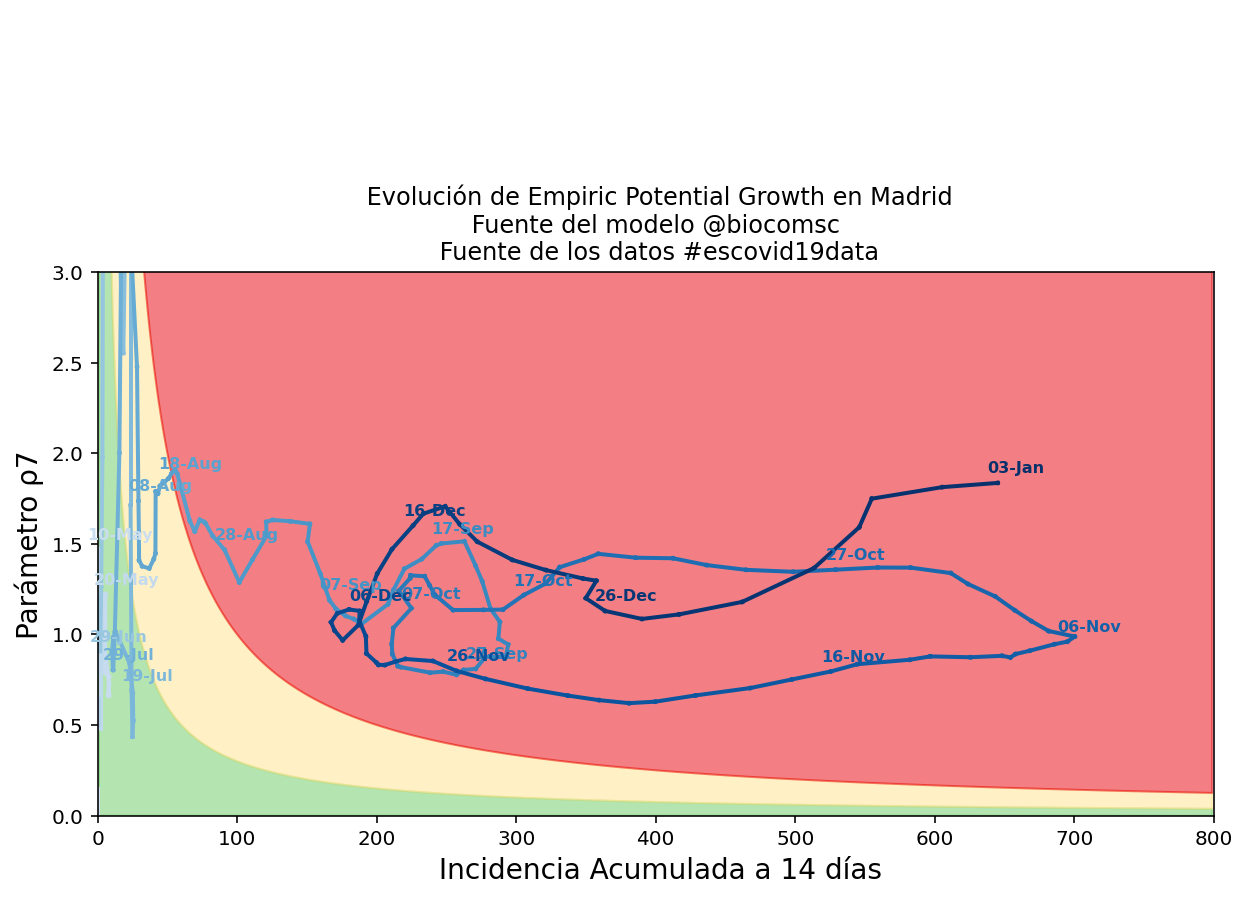

In [282]:
color_rojo = sns.color_palette("bright", 10)[3]
color_verde = sns.color_palette("muted", 10)[2]
color_amarillo = sns.color_palette("YlOrRd", 10)[1]
colores = sns.color_palette("Blues",datos.shape[0])[::]
color_texto = 'navy'
eje_X = ' Incidencia Acumulada a 14 días'
eje_Y = 'Parámetro \u03C1'+'7'

fuente_modelo = 'https://biocomsc.upc.edu/en/shared/20200412_report_web_27.pdf'


x_max = round((datos[AI].max()//100+1)*100,-2)
y_max = min(3,round(datos['p7_avg7'].max(),1))
rango = np.arange(1,x_max,1)

fig,ax = plt.subplots(figsize=(10, 5), dpi=144)
ax.set_xlim(0,x_max)
ax.set_ylim(0,y_max)
ax.grid(False,axis='both')
  
ax.set_ylabel(eje_Y,size=14,color='black')
ax.set_xlabel(eje_X,size=14,color='black')
rango=np.arange(0,x_max,1)
    
ax.fill_between(rango, 0, 30/rango,
                 facecolor="blue", # The fill color
                 color=color_verde,       # The outline color
                 alpha=0.5) 
ax.fill_between(rango, 30/rango, 100/rango,
                 facecolor='blue', # The fill color
                 color=color_amarillo,       # The outline color
                 alpha=0.5) 
ax.fill_between(rango,100/rango,10,
                 facecolor="blue", # The fill color
                 color=color_rojo,       # The outline color
                 alpha=0.5)
    
ax.set_title(' Evolución de Empiric Potential Growth en Madrid\n Fuente del modelo @biocomsc \n Fuente de los datos #escovid19data', fontsize=12)

ax.scatter(datos[AI],datos['p7_avg7'],color=colores,marker='o',
               s=2)

x_init,y_init = datos.iloc[8][[AI,'p7_avg7']]
for i in range(0,datos.shape[0]):
    ax.plot(datos.loc[i:i+1,AI],datos.loc[i:i+1]['p7_avg7'],
            color=colores[::][i],lw=2,scaley=False)

    style = dict(size=8, color=colores[i],weight='bold')
    if (i % 10 == 0) | (i==(datos.shape[0]-1)):
        texto = ax.annotate(datos.loc[i,'date'].strftime('%d-%b'),
                                xy=(datos.loc[i,AI],datos.loc[i,'p7_avg7']),
                                xycoords='data',
                                xytext=(-5, 5), 
                                textcoords='offset points',
                                **style)

In [283]:
# Gráfico de BiocomSC

def grafico_EPG(datos_, provincia,
                desde=datetime(year=2020,month=3,day=1)):
    campo = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_particulares',
          'Teruel':'casos_particulares', 'Zaragoza':'casos_particulares', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_particulares','Castellón/Castelló':'casos_particulares',
          'Valencia/València':'casos_particulares','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'PCR', 'Araba/Álava':'casos_particulares',
          'Bizkaia':'casos_particulares', 'Gipuzkoa':'casos_particulares',
       'Rioja, La':'PCR'}
    datos = datos_.fillna(0,axis=1)
    datos = datos[(datos['date']>=desde) & (datos['province'] == provincia)]
    IA14='ia14'
    IA14='ia14_calculada'
    ventana_IA14 = 14
    
    p7 = 'p7_avg7'
    fecha = 'date'
    titulo = 'Evolución de Empiric Potential Growth en {}\n'.format(provincia) 
    fuente_modelo = 'Fuente del modelo @biocomsc \n'  
    fuente_datos = 'Fuente de los datos #escovid19data'
    titulo = titulo + fuente_modelo + fuente_datos
    un_dia=timedelta(days=1)
    dos_dias=timedelta(days=2)
    cinco_dias=timedelta(days=5)
    seis_dias=timedelta(days=6)
    cuatro_dias=timedelta(days=4)
    path='graficos/'
    nombre_fichero=path+'EPG_de_{}'.format(provincia.replace('/','_'))
    
    def calculo_p7(x):
        fecha_actual=x['date']
        try:
            valor = (datos.loc[datos['date']==fecha_actual+un_dia,campo[provincia]].values[0]+\
            datos.loc[datos['date']==(fecha_actual),campo[provincia]].values[0]+\
            datos.loc[datos['date']==(fecha_actual-un_dia),campo[provincia]].values[0])/\
            (datos.loc[datos['date']==(fecha_actual-cuatro_dias),campo[provincia]].values[0]+\
             datos.loc[datos['date']==(fecha_actual-seis_dias),campo[provincia]].values[0]+\
             datos.loc[datos['date']==(fecha_actual-cinco_dias),campo[provincia]].values[0])
        except:
            valor = np.NaN
        return valor
    casos_particulares=['Alicante/Alacant','Castellón/Castelló',
              'Valencia/València','Zaragoza','Huesca',
              'Teruel','Bizkaia','Araba/Álava','Gipuzkoa']
    if provincia in casos_particulares:
        datos['casos_particulares']=\
        datos['PCR']+\
        datos['new_cases']
    
    datos[IA14] = datos[campo[provincia]].rolling(ventana_IA14).sum()\
    /datos['poblacion']*100000

    datos[p7] = datos.apply(calculo_p7,axis=1)
    datos[p7] = datos[p7].rolling(window=7).mean()
    datos = datos.reset_index()
    datos = datos.drop(['index'],axis=1)
    datos=datos[[fecha,IA14,p7]]
    
    color_rojo = 'red'
    color_verde = 'green'
    color_amarillo = 'yellow'
    colores = sns.color_palette("Blues",datos.shape[0])[::]
    color_texto = 'navy'
    eje_X = ' Incidencia Acumulada a 14 días'
    eje_Y = 'Parámetro \u03C1'+'7'

    fuente_modelo = 'https://biocomsc.upc.edu/en/shared/20200412_report_web_27.pdf'


    x_max = round((datos[IA14].max()//100+1)*100,-2)
    y_max = min(3,round(datos[p7].max(),1))
    rango = np.arange(1,x_max,1)

    fig,ax = plt.subplots(figsize=(10, 5), dpi=144)
    ax.set_xlim(0,x_max)
    ax.set_ylim(0,y_max)
    ax.grid(False,axis='both')
  
    ax.set_ylabel(eje_Y,size=14,color='black')
    ax.set_xlabel(eje_X,size=14,color='black')
    rango=np.arange(0,x_max,1)
    
    ax.fill_between(rango, 0, 30/rango,
                     facecolor="blue", # The fill color
                 color=color_verde,       # The outline color
                 alpha=0.5) 
    ax.fill_between(rango, 30/rango, 100/rango,
                 facecolor='blue', # The fill color
                 color=color_amarillo,       # The outline color
                 alpha=0.5) 
    ax.fill_between(rango,100/rango,10,
                 facecolor="blue", # The fill color
                 color=color_rojo,       # The outline color
                 alpha=0.5)
    
    ax.set_title(titulo, fontsize=12)

    ax.scatter(datos[IA14],datos[p7],color=colores,marker='o',
               s=2)

    x_init,y_init = datos.iloc[8][[IA14,p7]]
    for i in range(0,datos.shape[0]):
        ax.plot(datos.loc[i:i+1,IA14],datos.loc[i:i+1][p7],
            color=colores[::][i],lw=2,scaley=False)

        style = dict(size=8, color=colores[i],weight='bold')
        if (i % 10 == 0) | (i==(datos.shape[0]-2)):
            texto = ax.annotate(datos.loc[i,fecha].strftime('%d-%b'),
                                xy=(datos.loc[i,IA14],datos.loc[i,p7]),
                                xycoords='data',
                                xytext=(-5, 5), 
                                textcoords='offset points',
                                **style)
    plt.savefig(nombre_fichero,dpi=144)  
    plt.show()
    return 

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


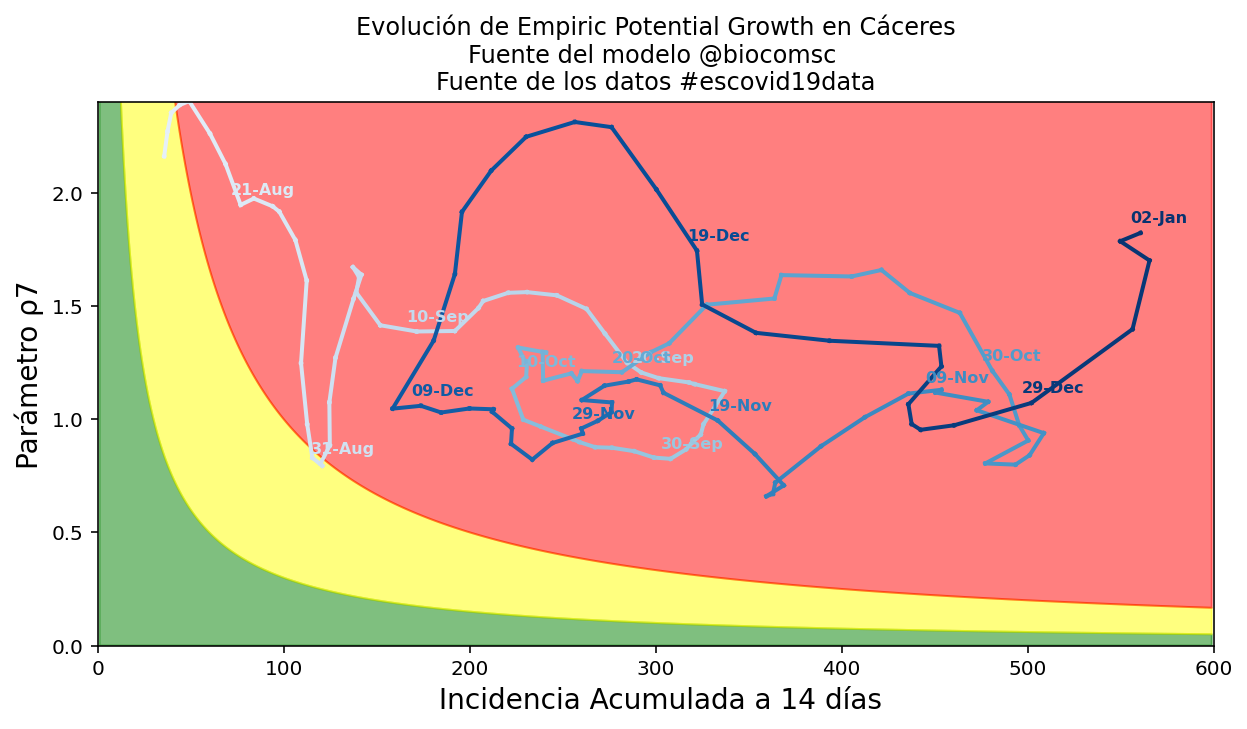

In [288]:
grafico_EPG(df, 'Cáceres',desde=datetime(year=2020,month=8,day=1))

<ipython-input-283-6f28bbd23fba>:48: RuntimeWarning: divide by zero encountered in double_scalars
  valor = (datos.loc[datos['date']==fecha_actual+un_dia,campo[provincia]].values[0]+\
<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


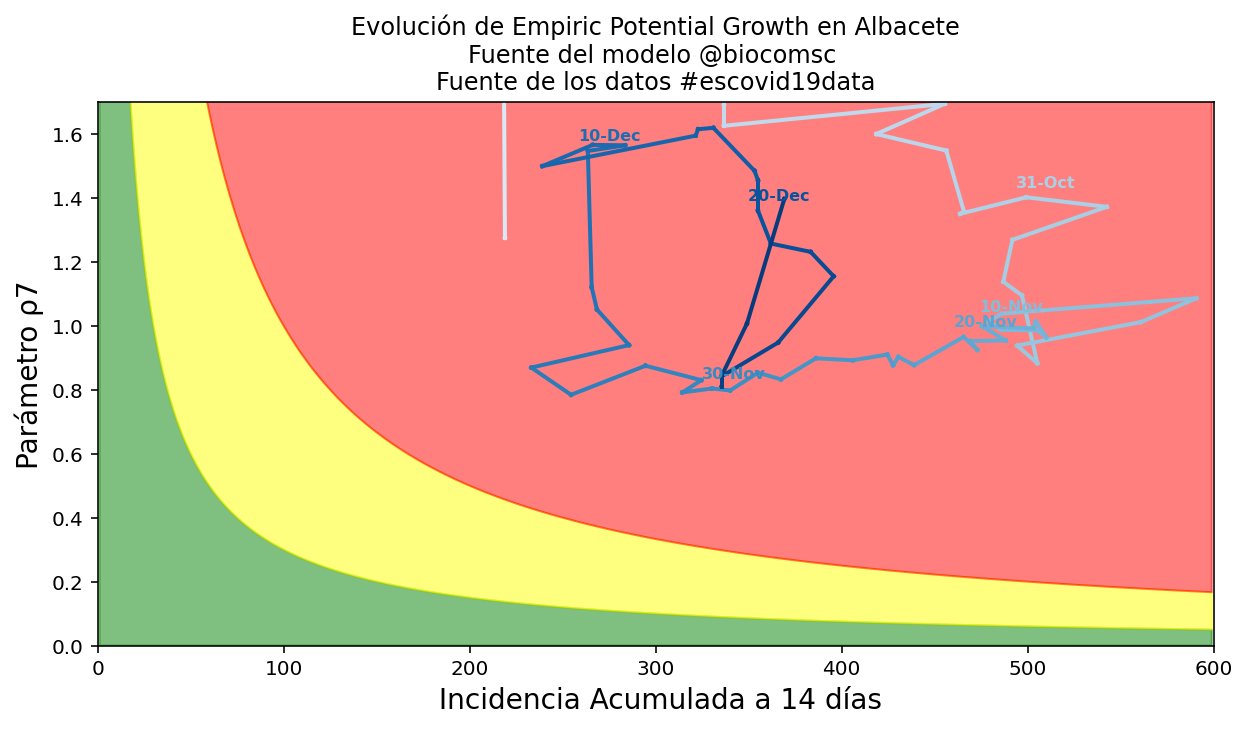

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


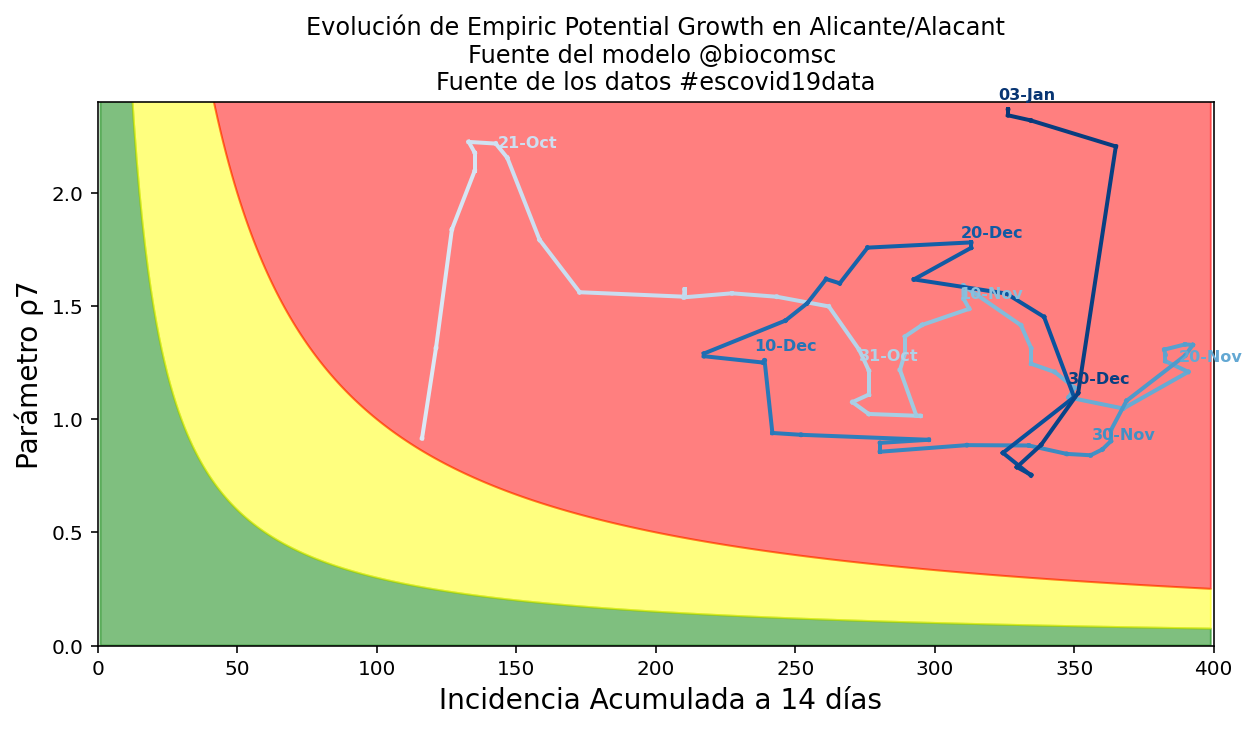

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


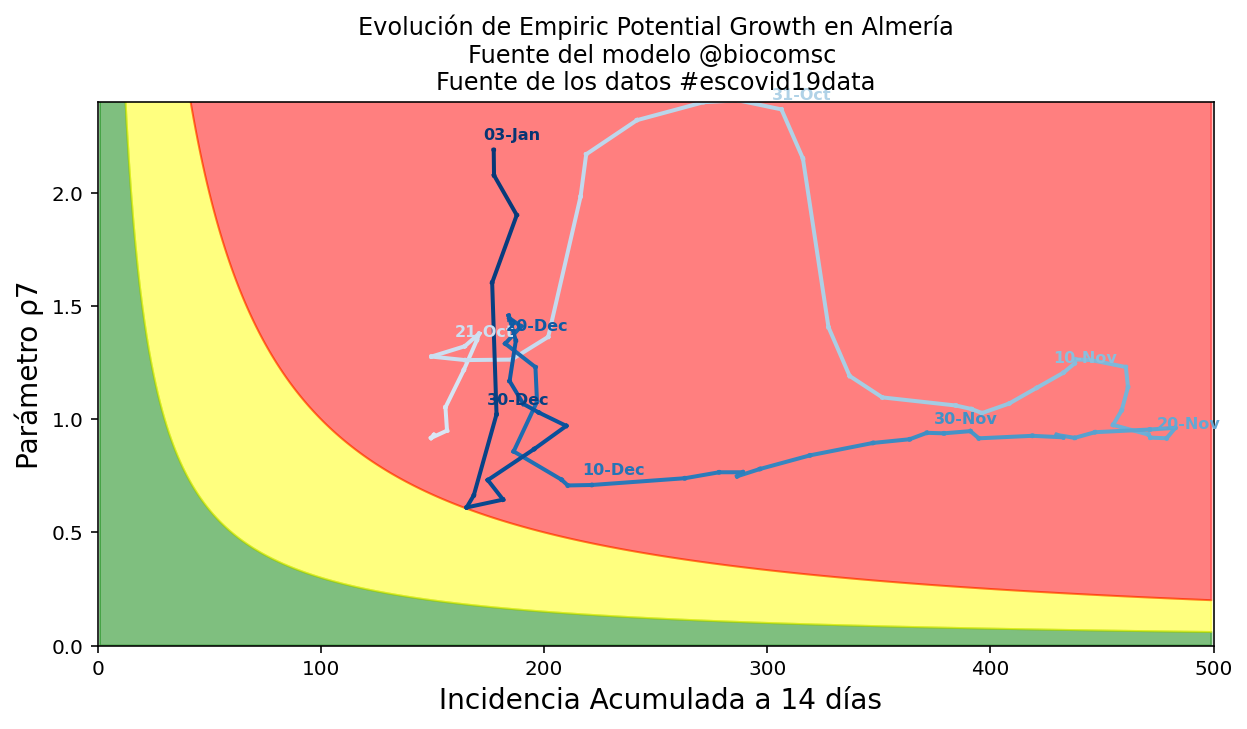

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


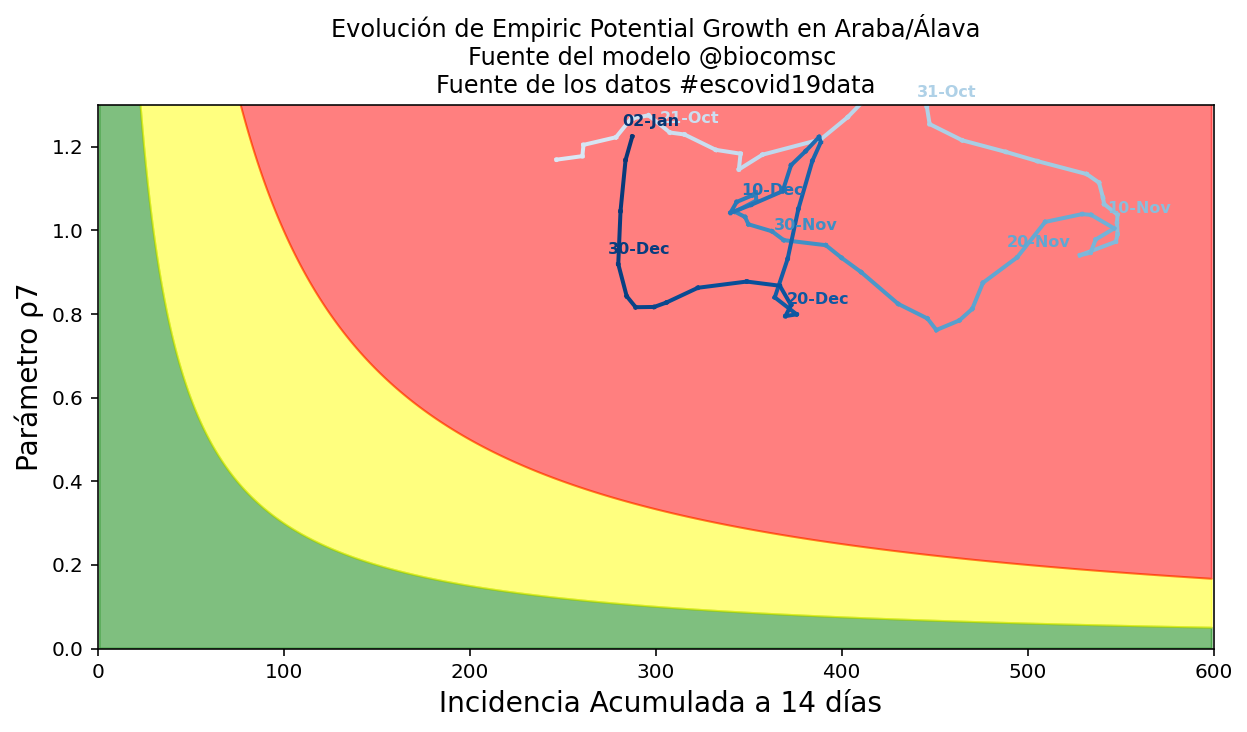

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


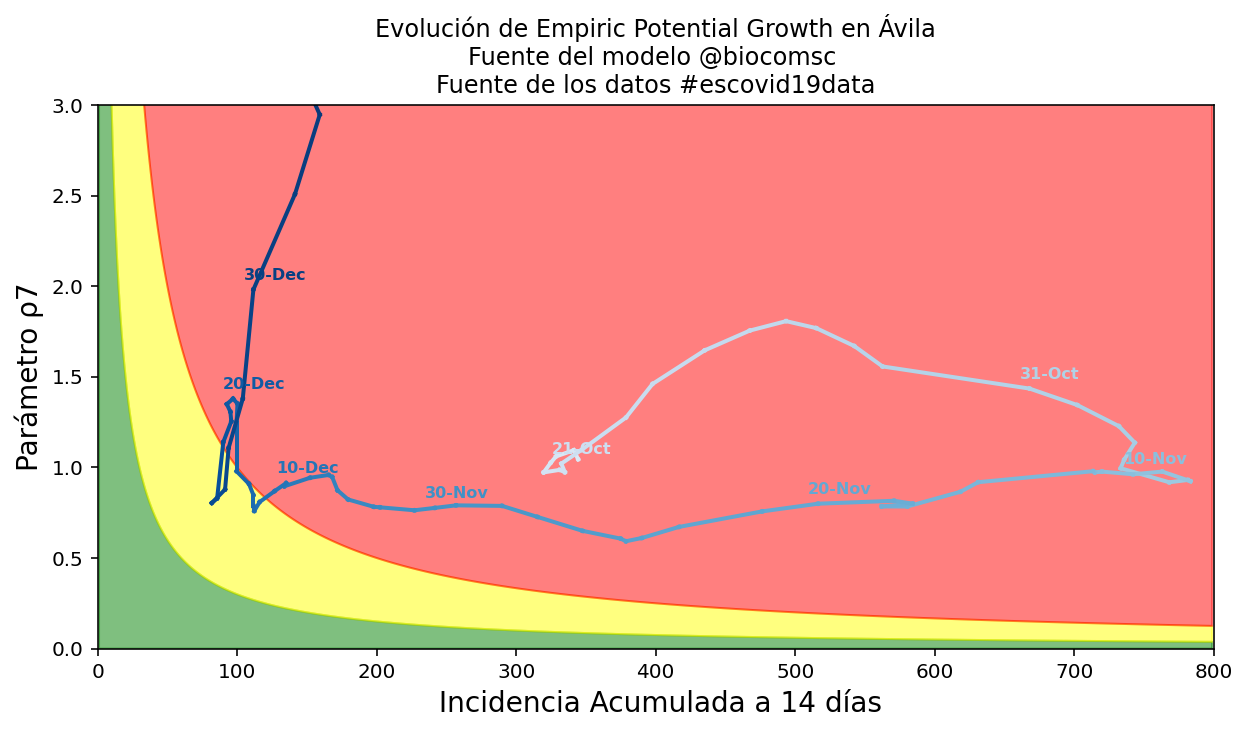

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


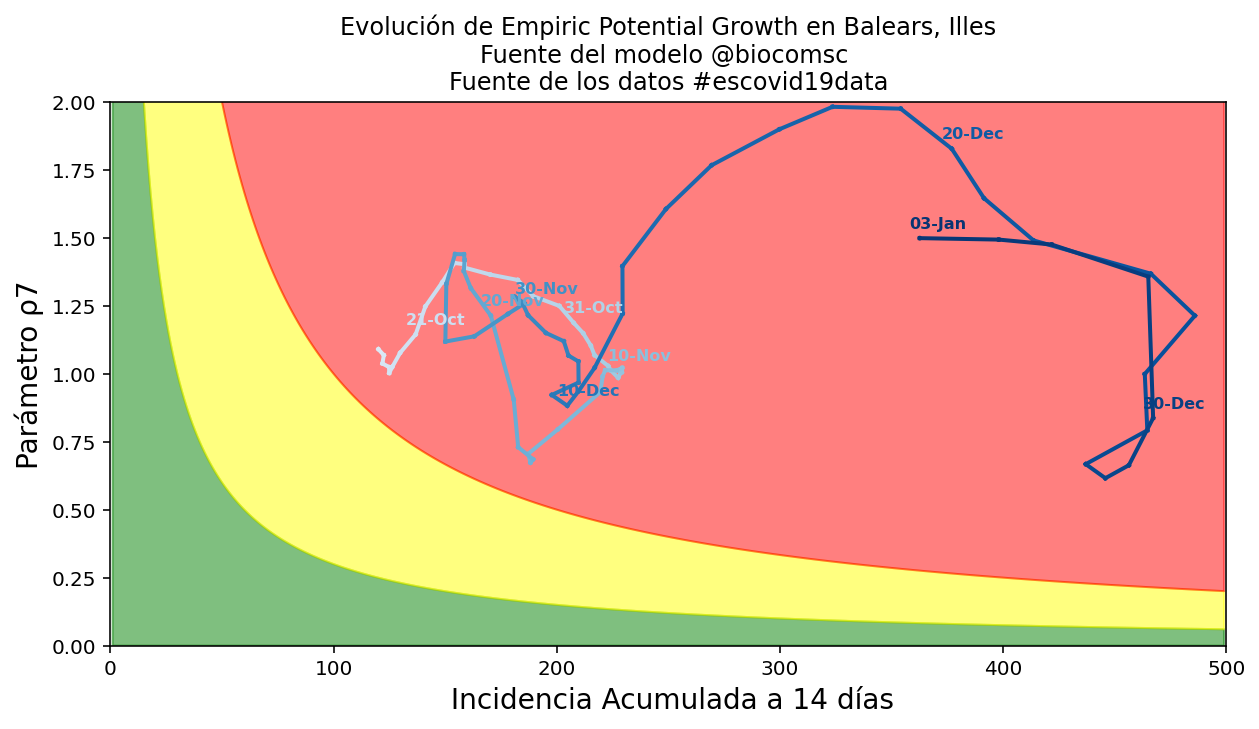

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


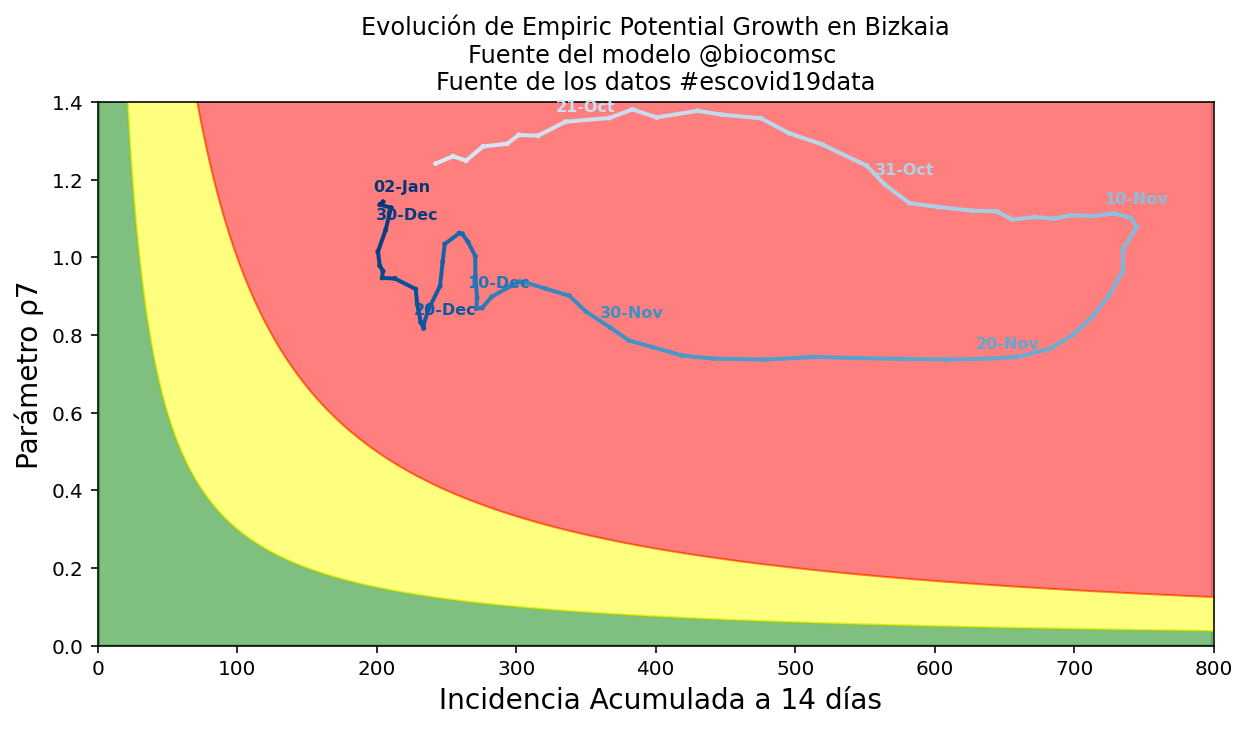

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


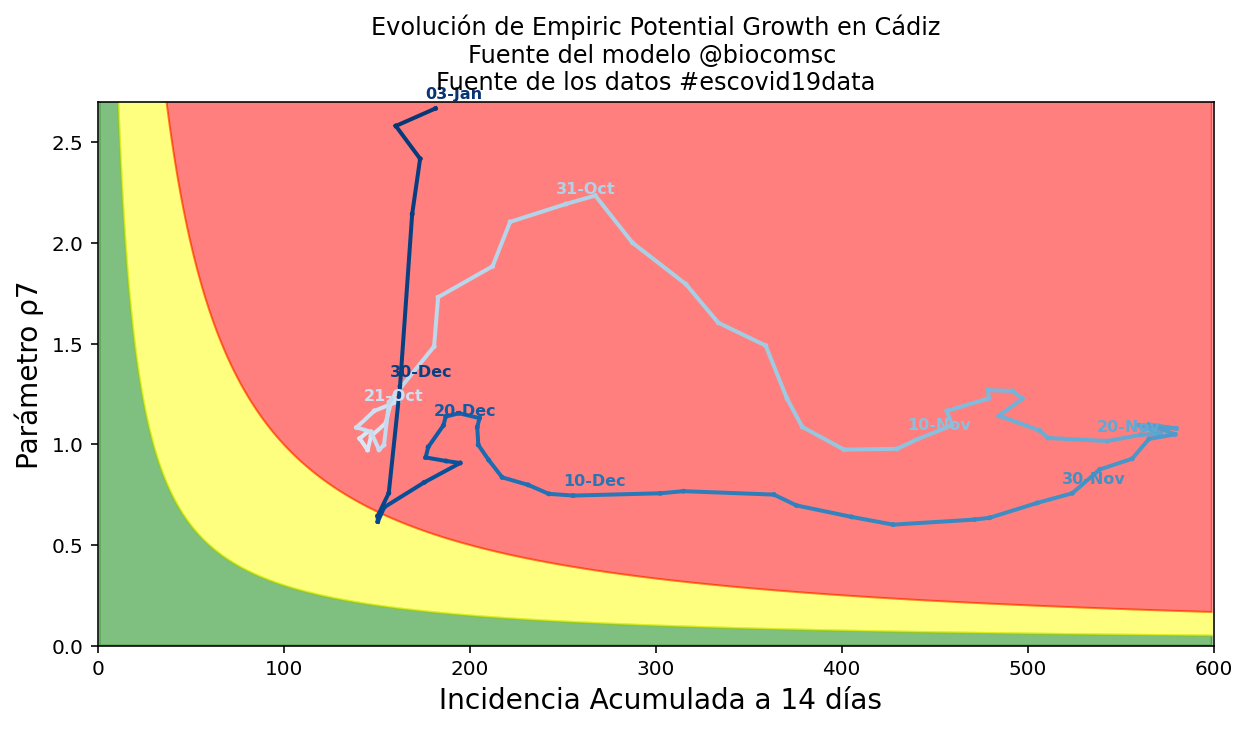

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


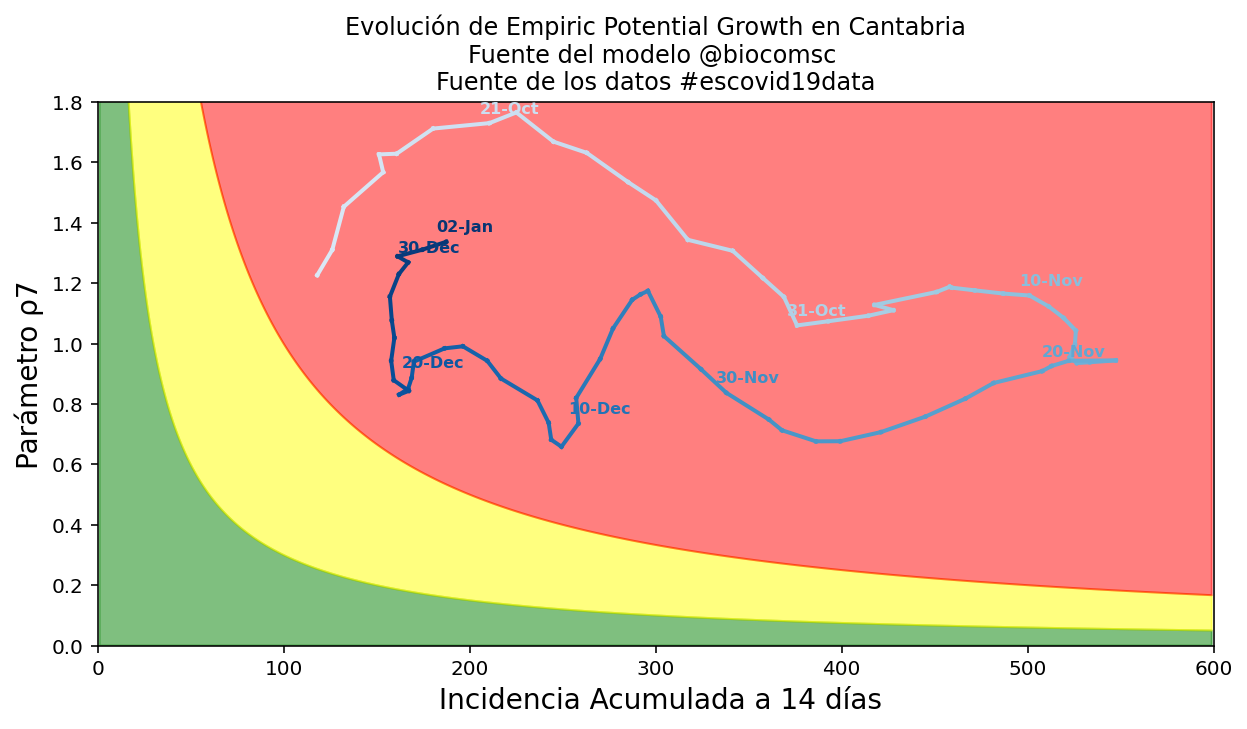

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


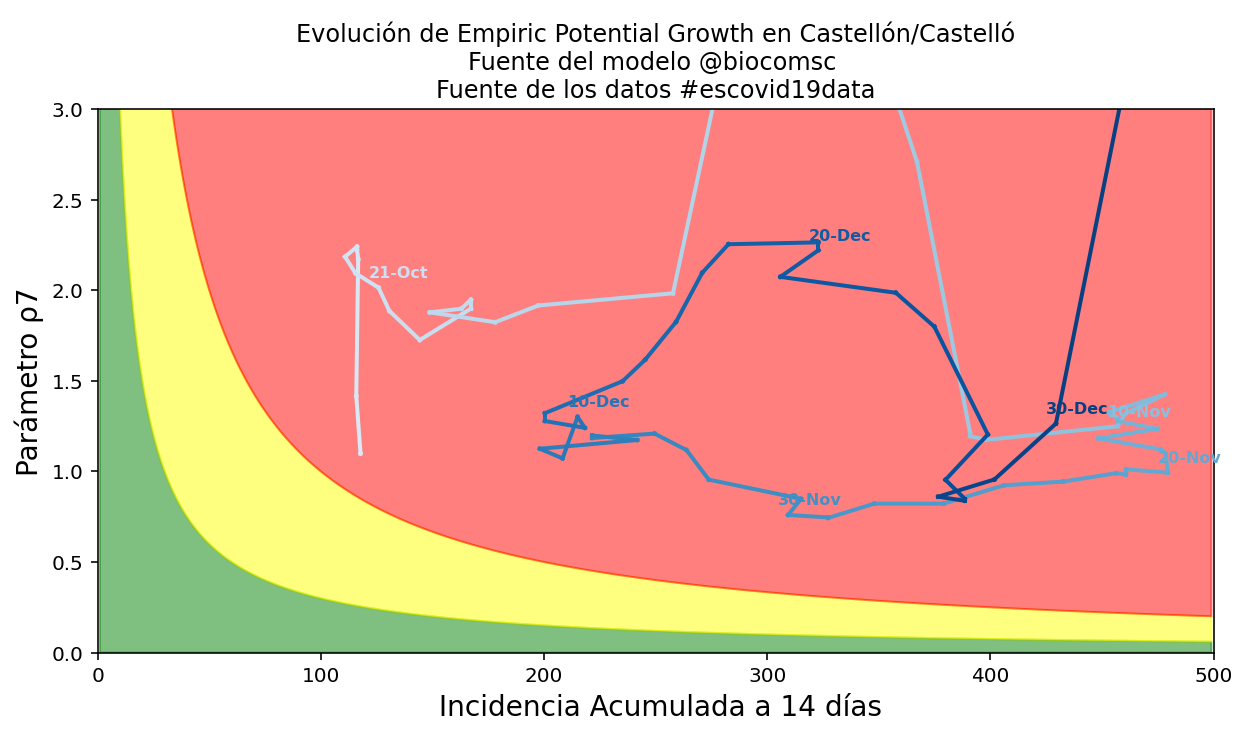

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:48: RuntimeWarning: divide by zero encountered in double_scalars
  valor = (datos.loc[datos['date']==fecha_actual+un_dia,campo[provincia]].values[0]+\
<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


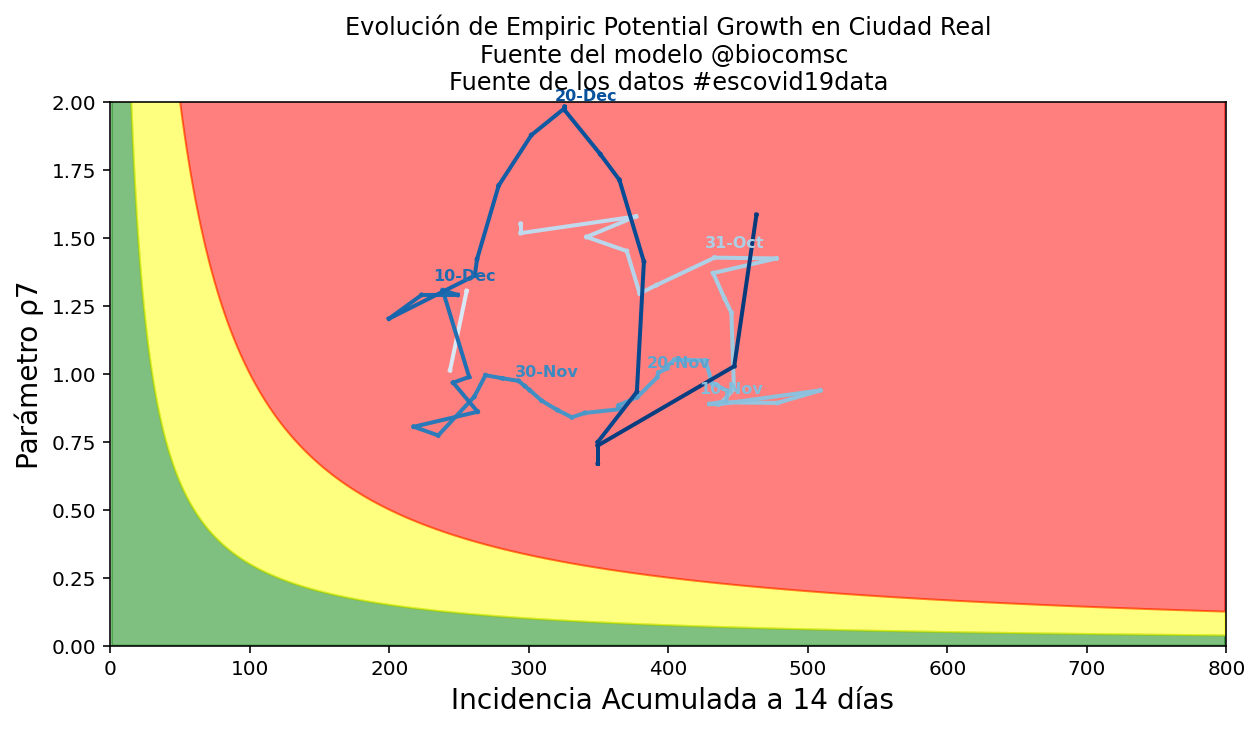

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


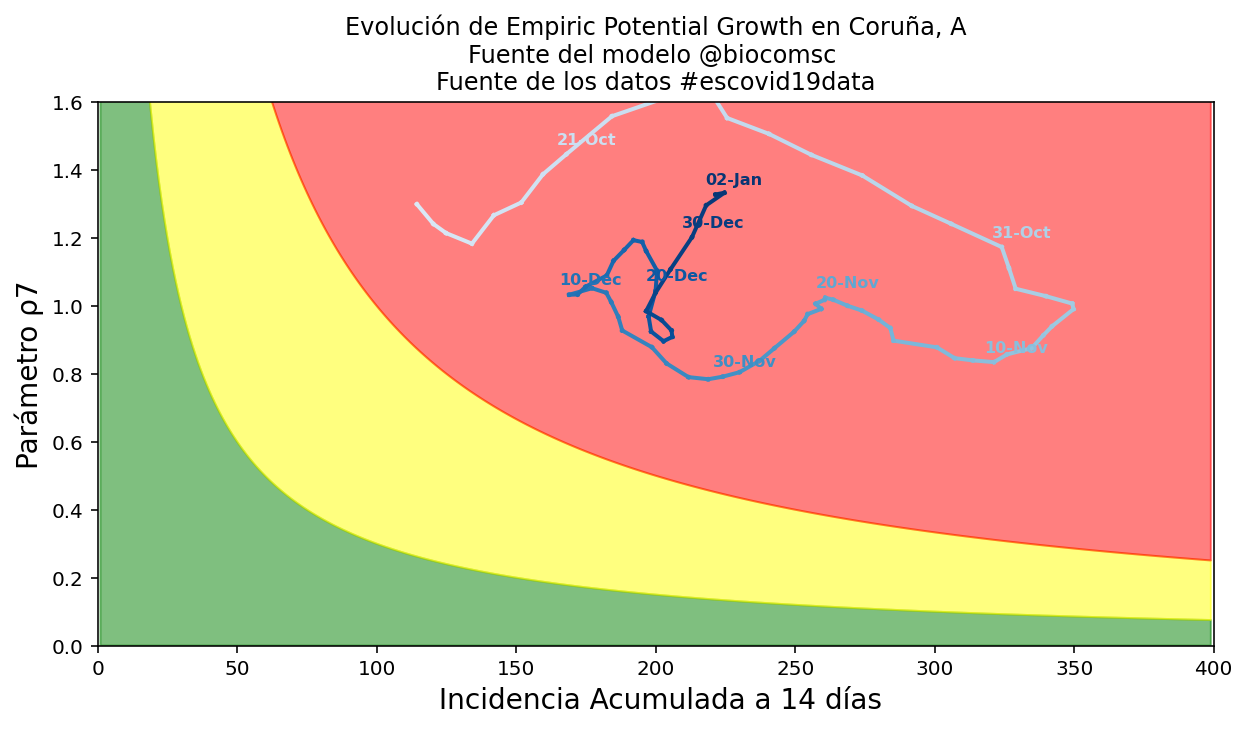

<ipython-input-283-6f28bbd23fba>:48: RuntimeWarning: divide by zero encountered in double_scalars
  valor = (datos.loc[datos['date']==fecha_actual+un_dia,campo[provincia]].values[0]+\
<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


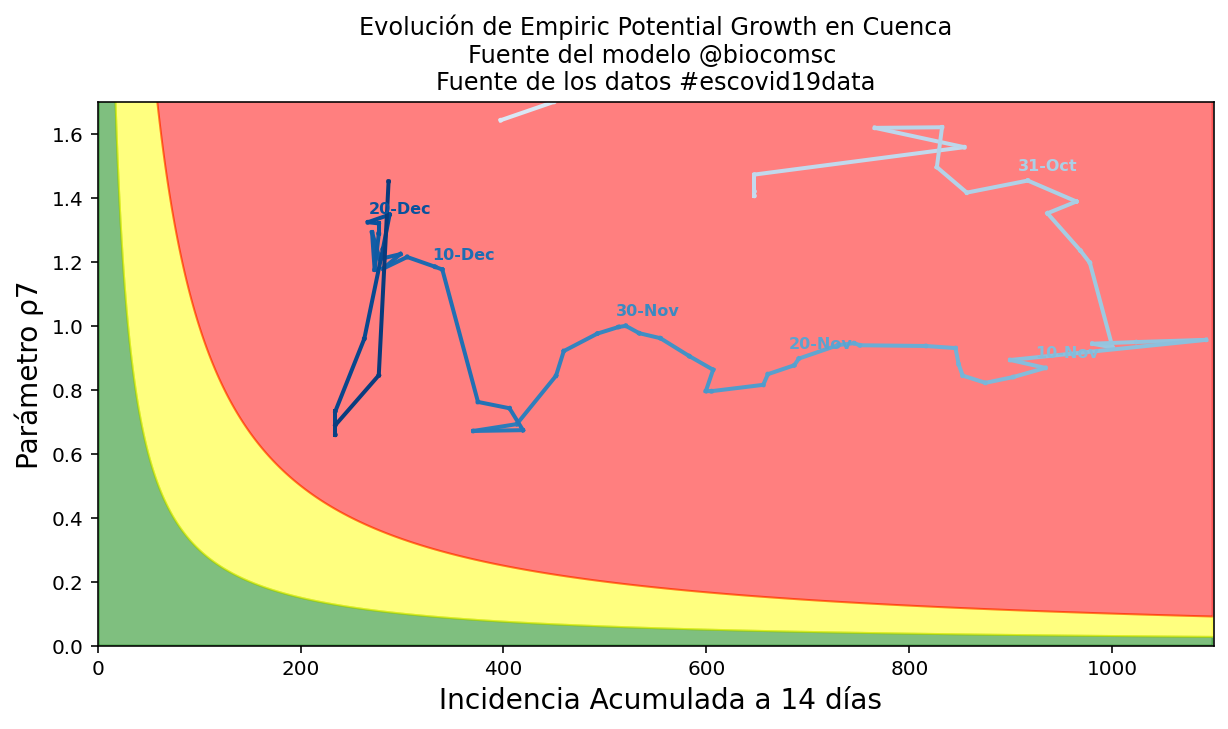

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


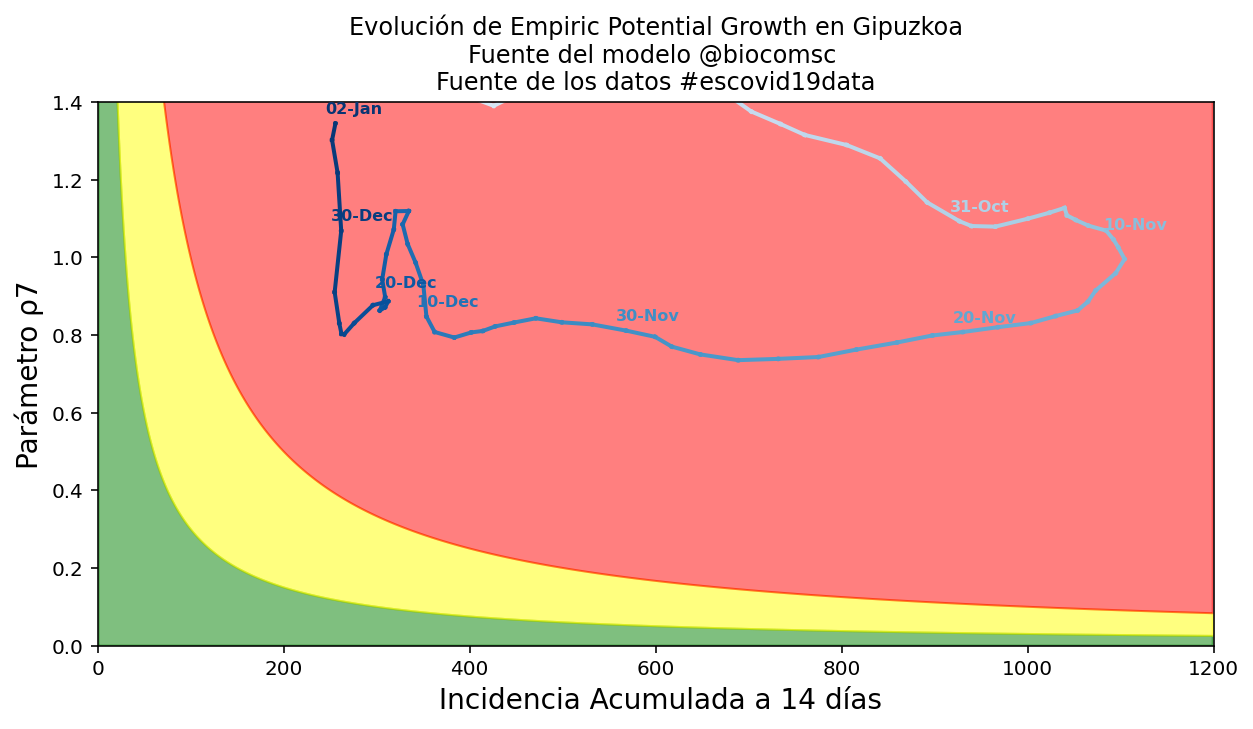

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


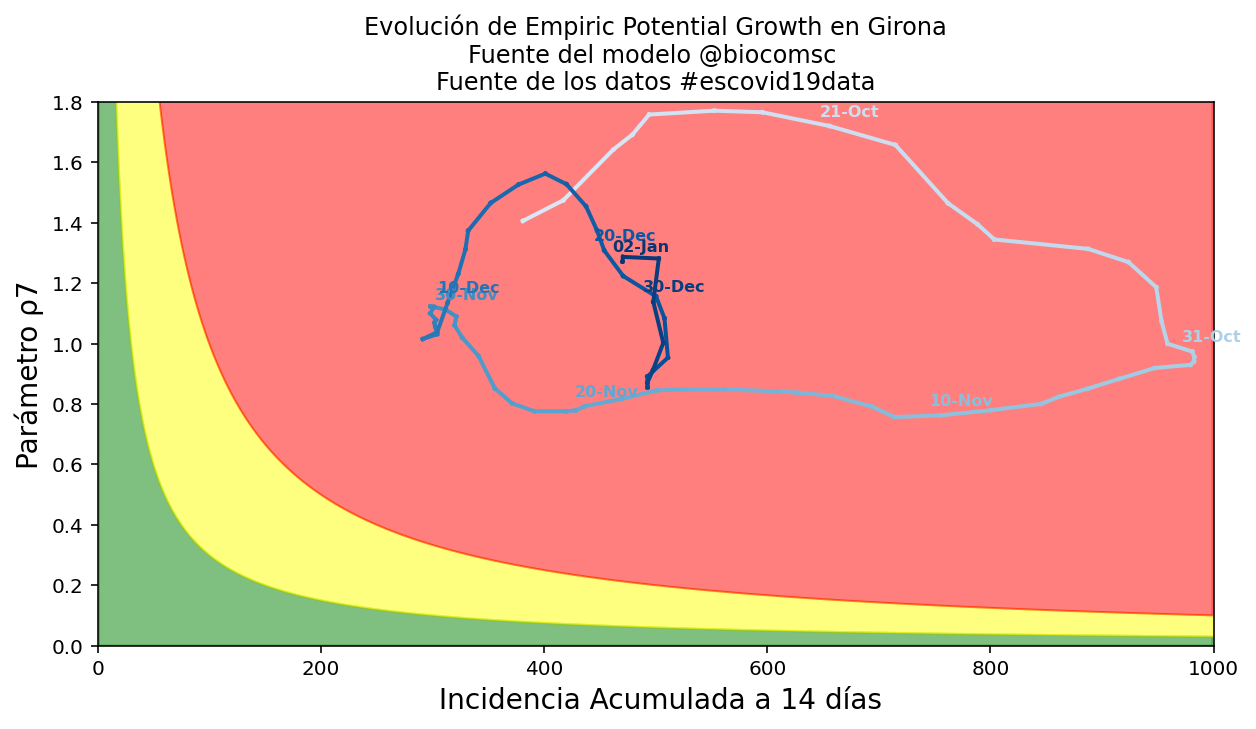

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


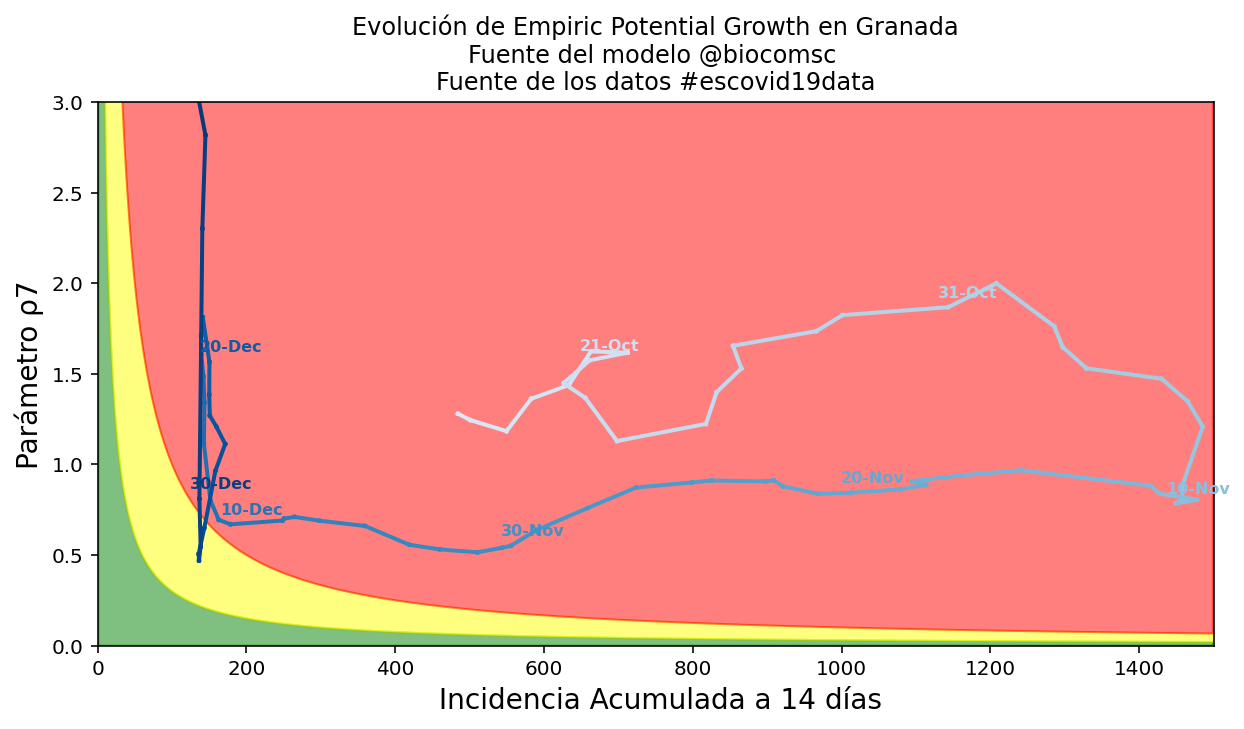

<ipython-input-283-6f28bbd23fba>:48: RuntimeWarning: divide by zero encountered in double_scalars
  valor = (datos.loc[datos['date']==fecha_actual+un_dia,campo[provincia]].values[0]+\
<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


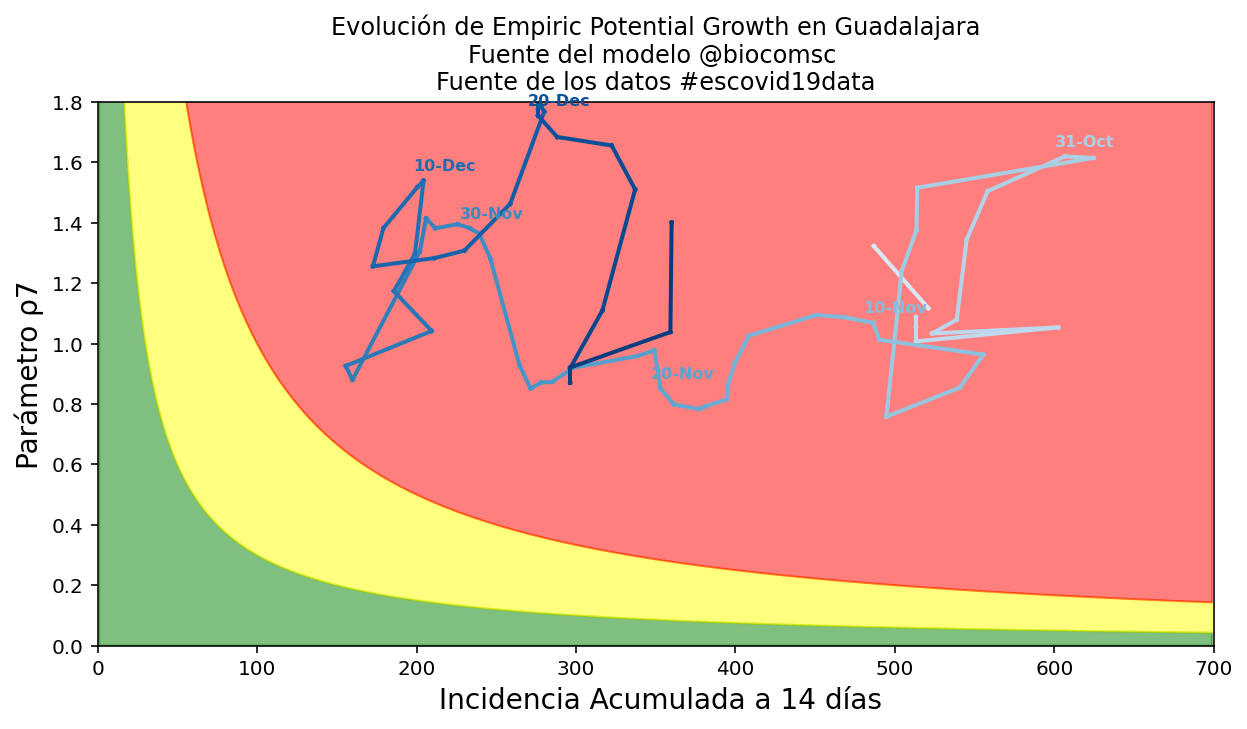

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


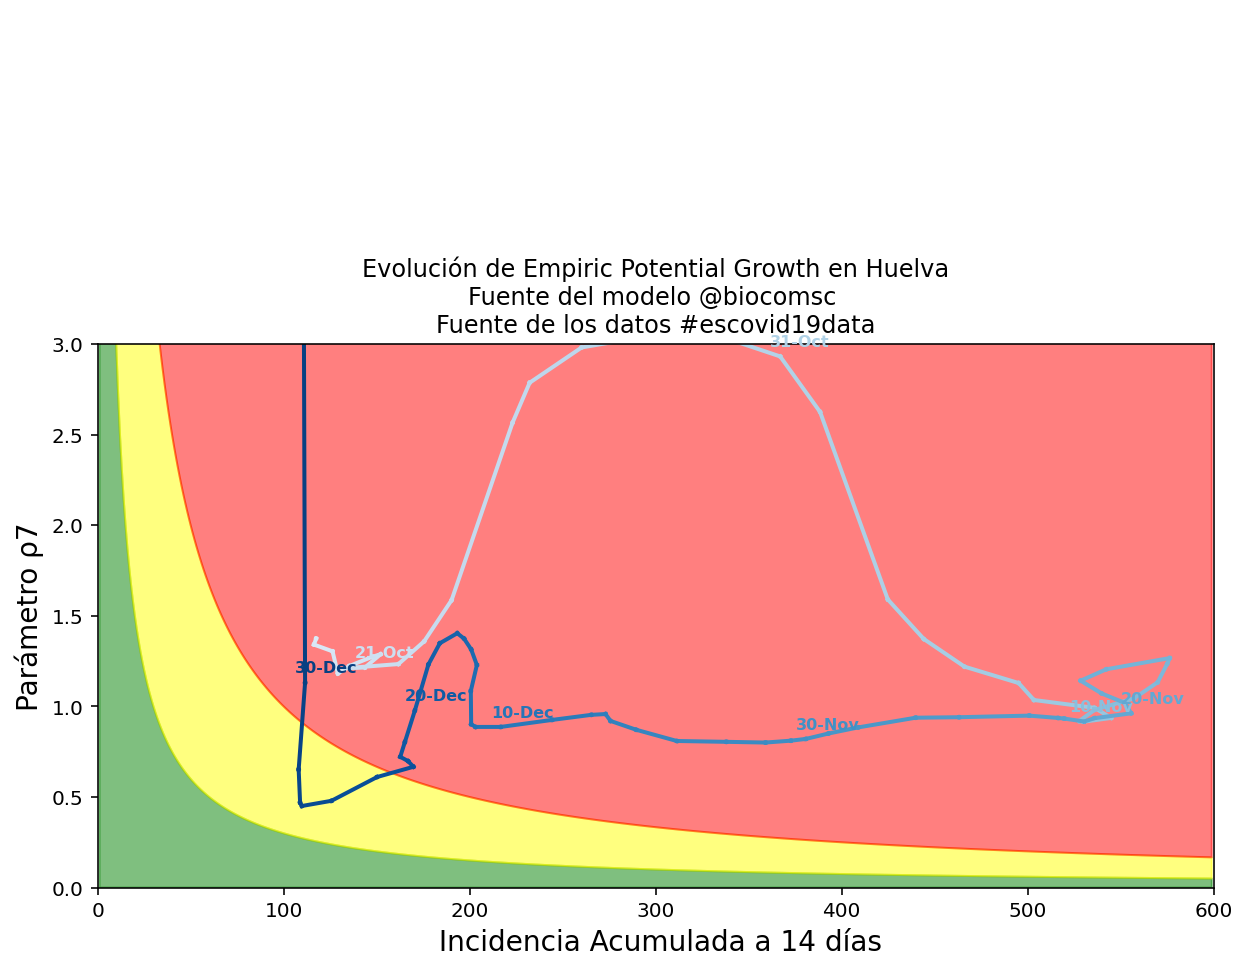

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


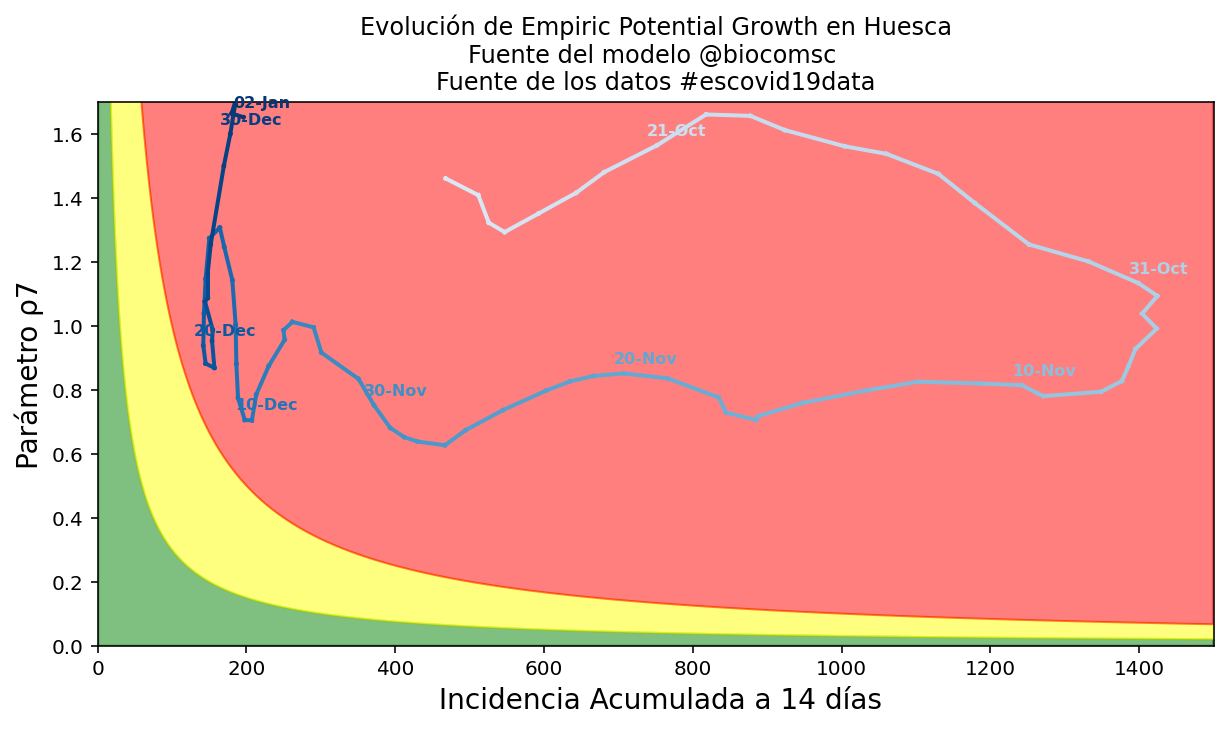

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


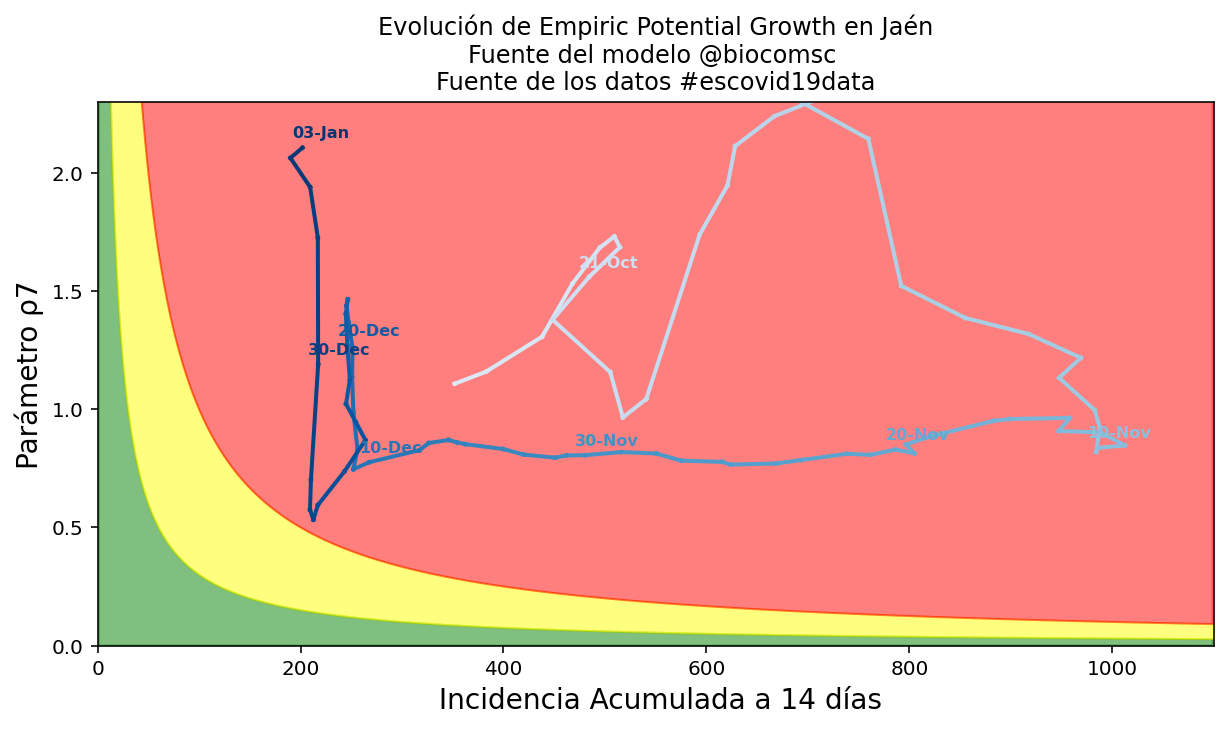

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


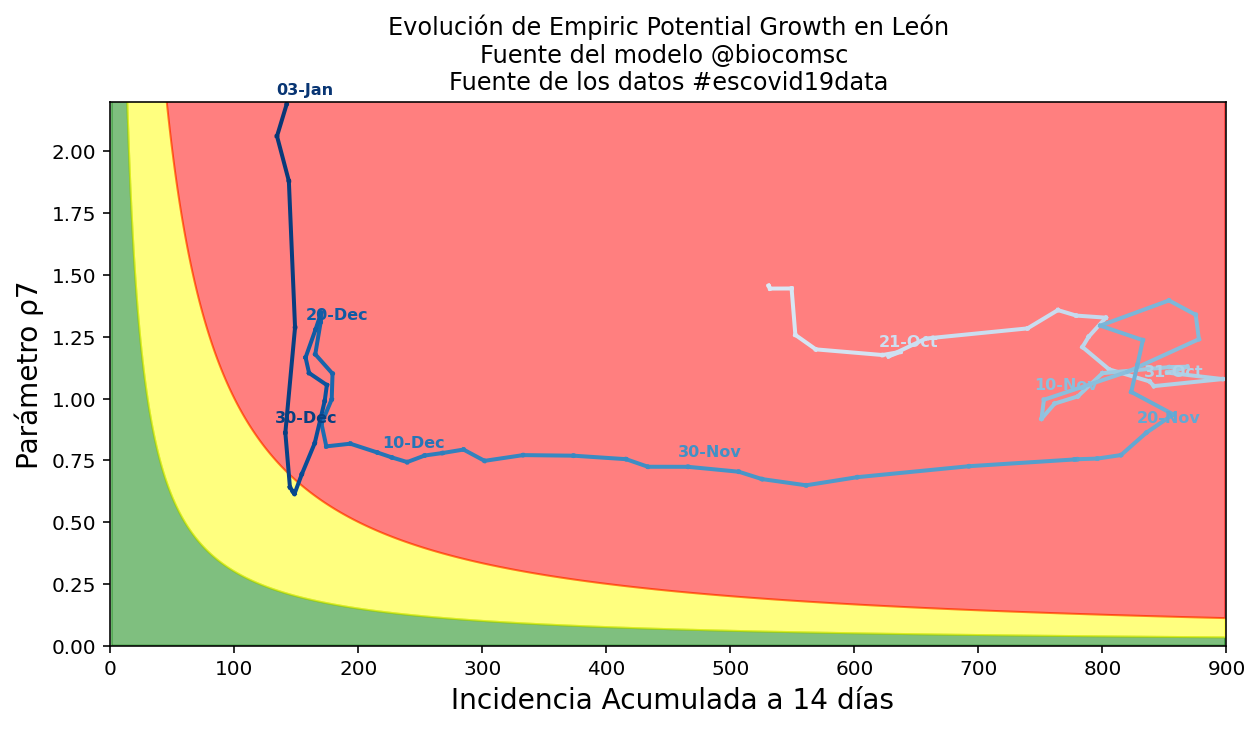

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


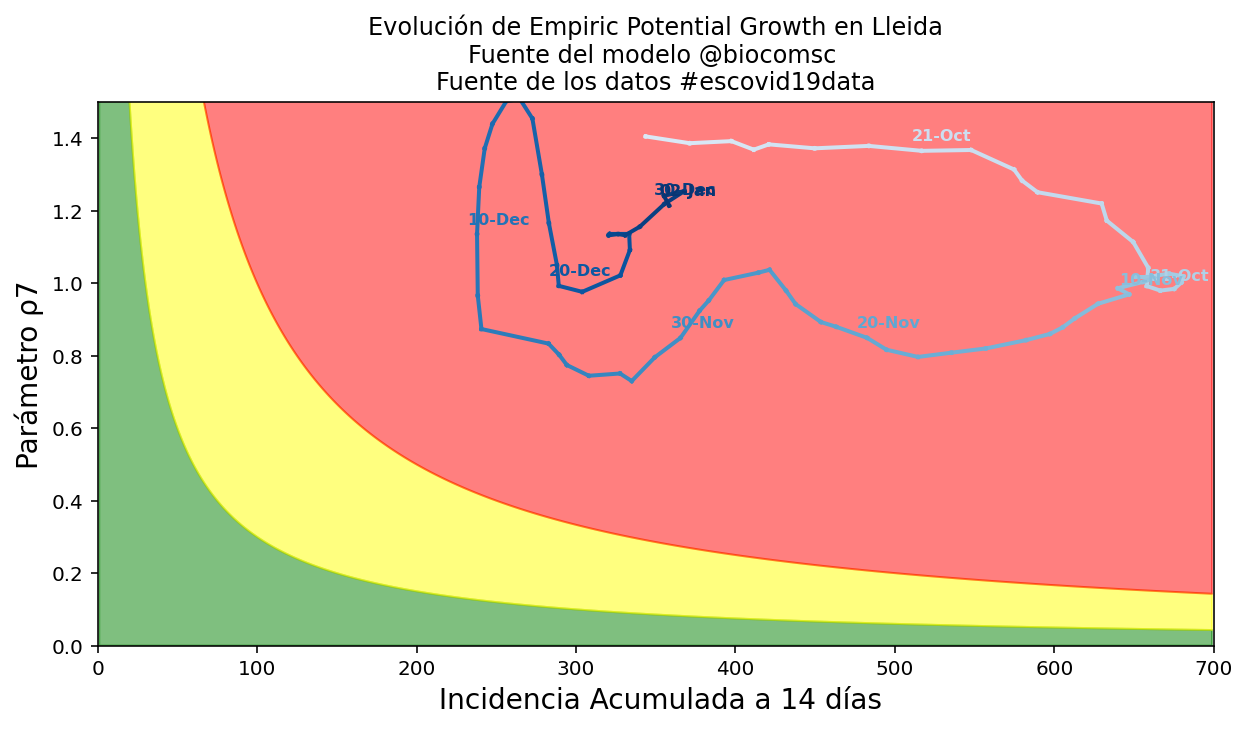

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


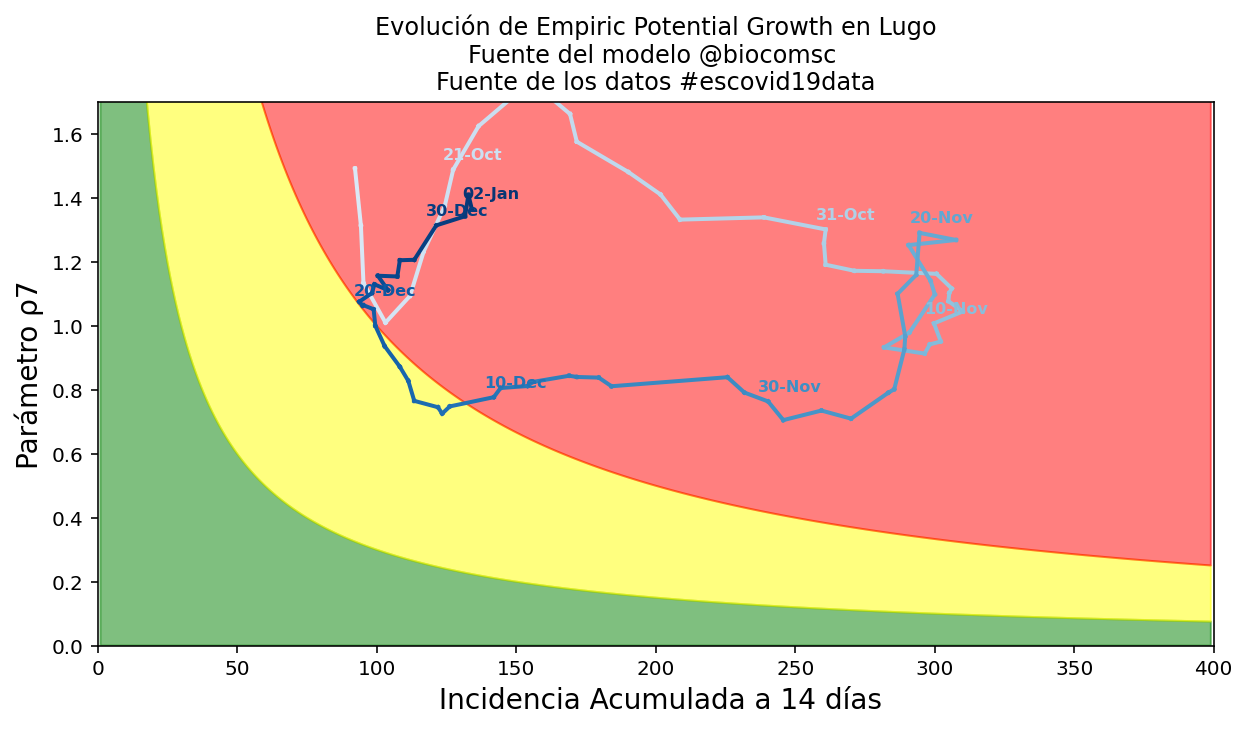

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


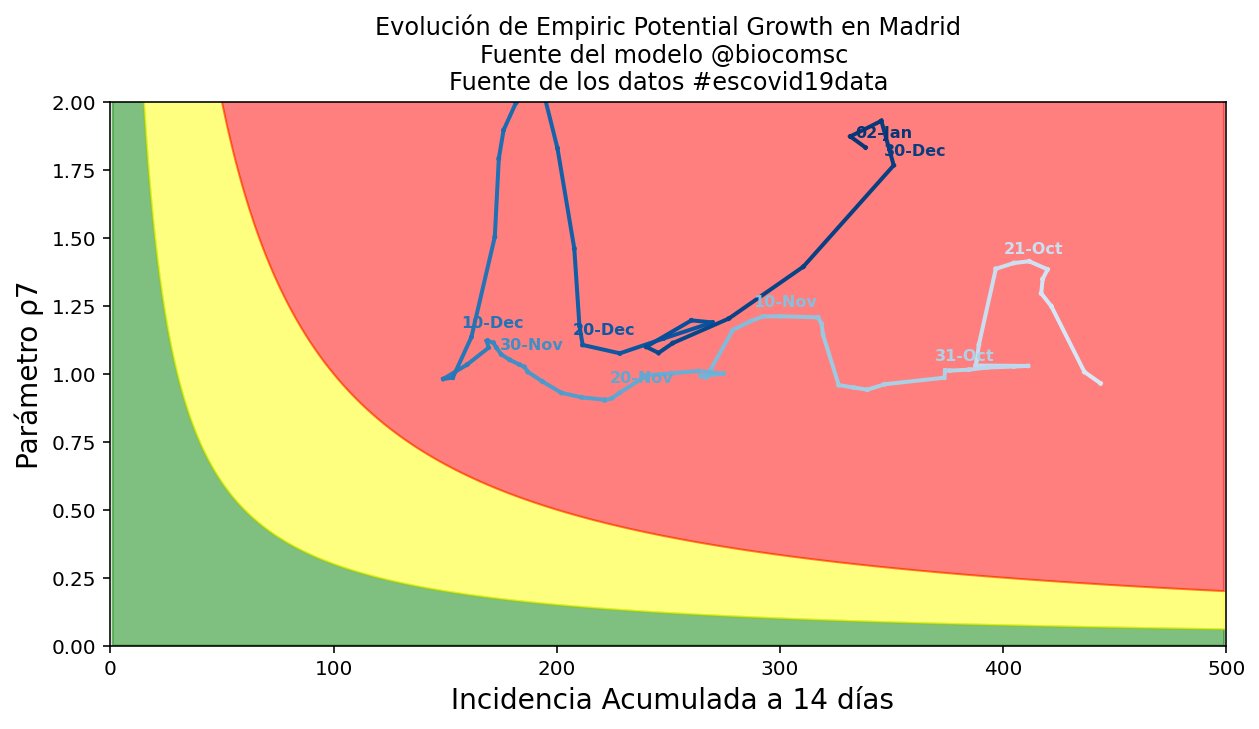

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


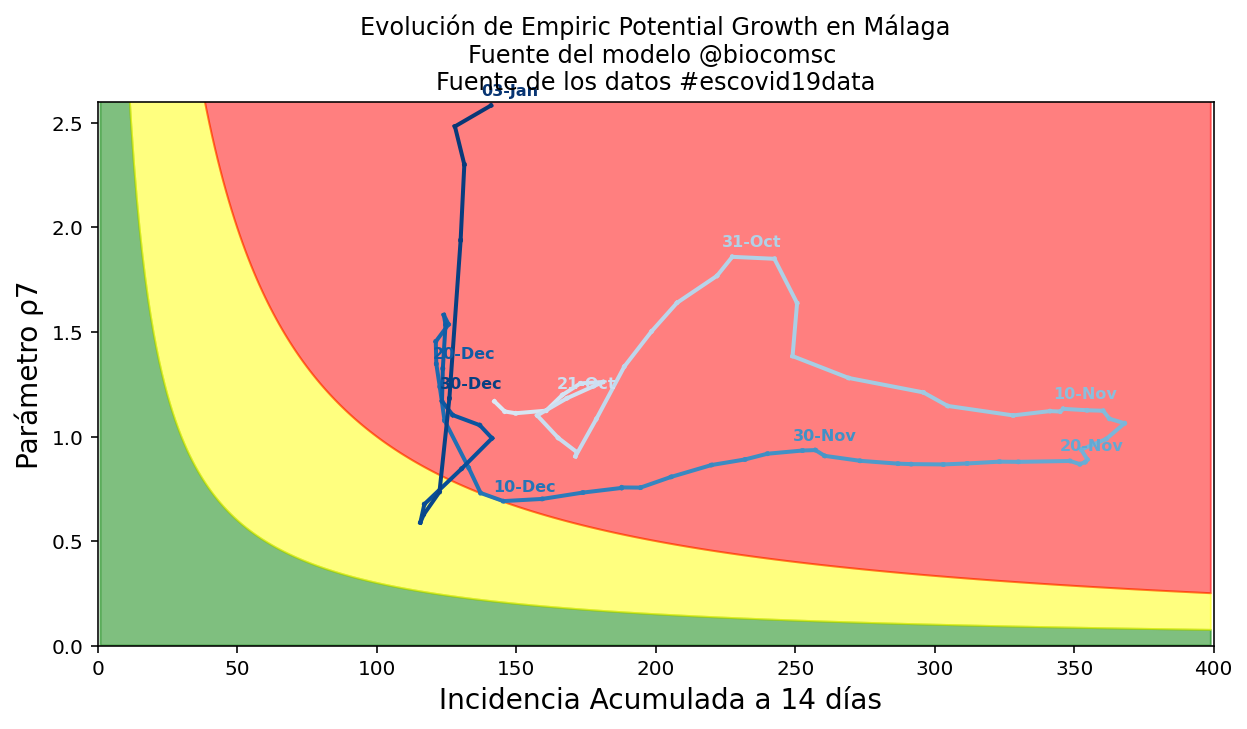

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


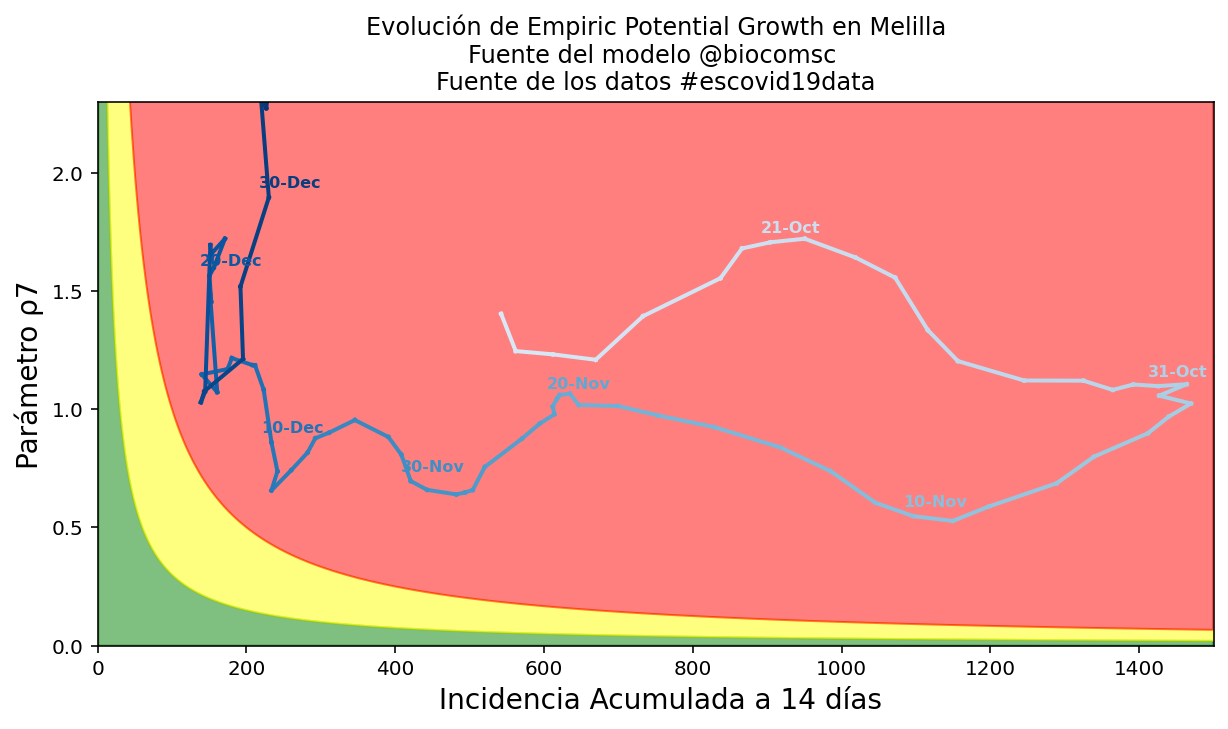

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


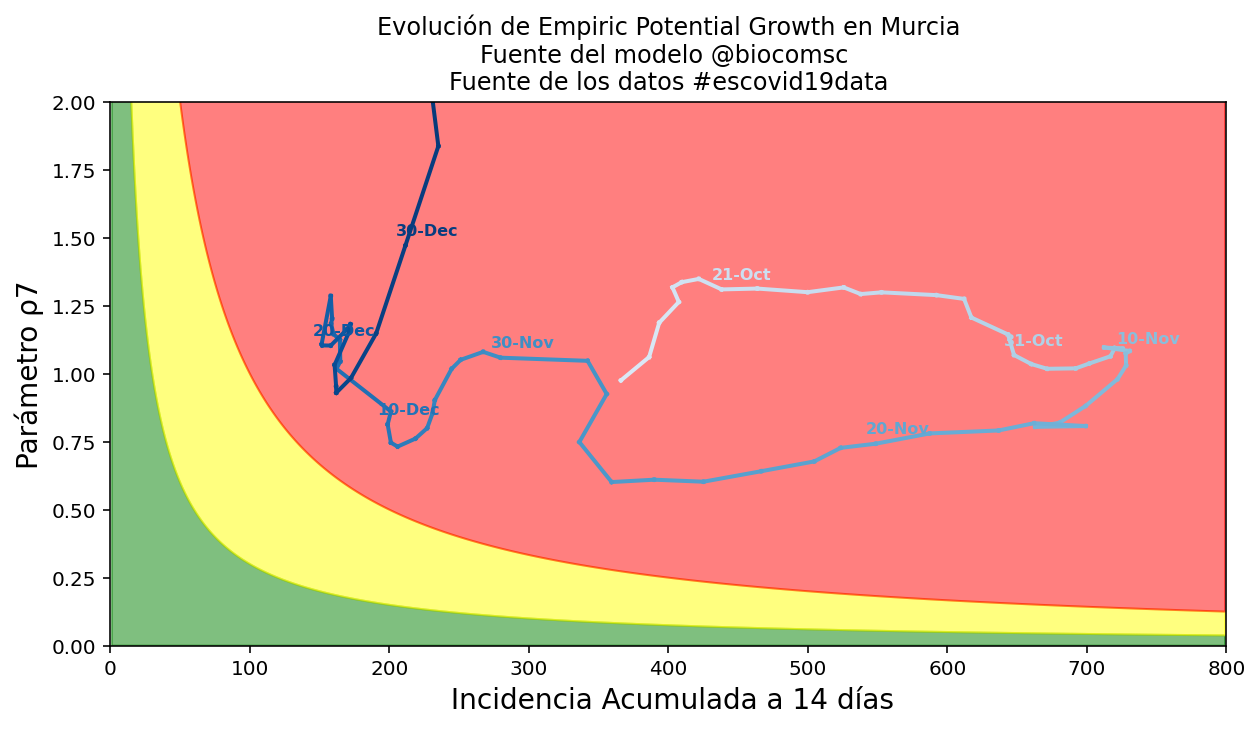

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


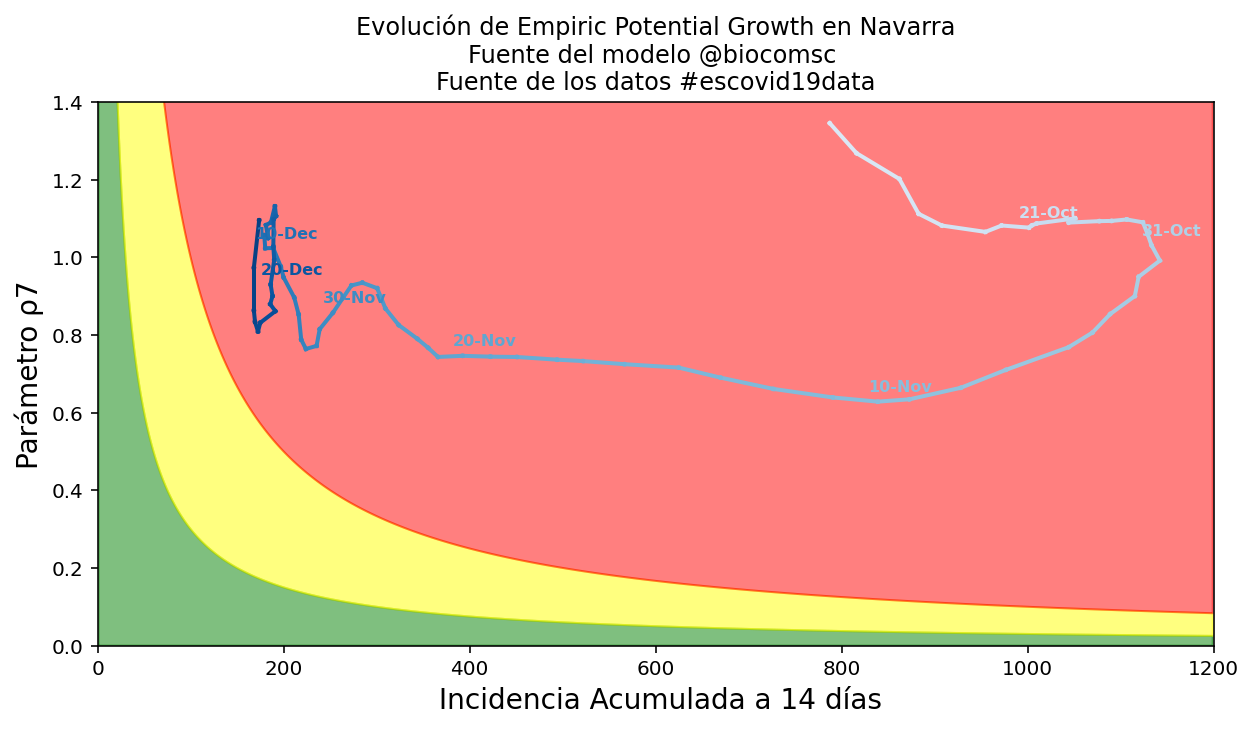

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


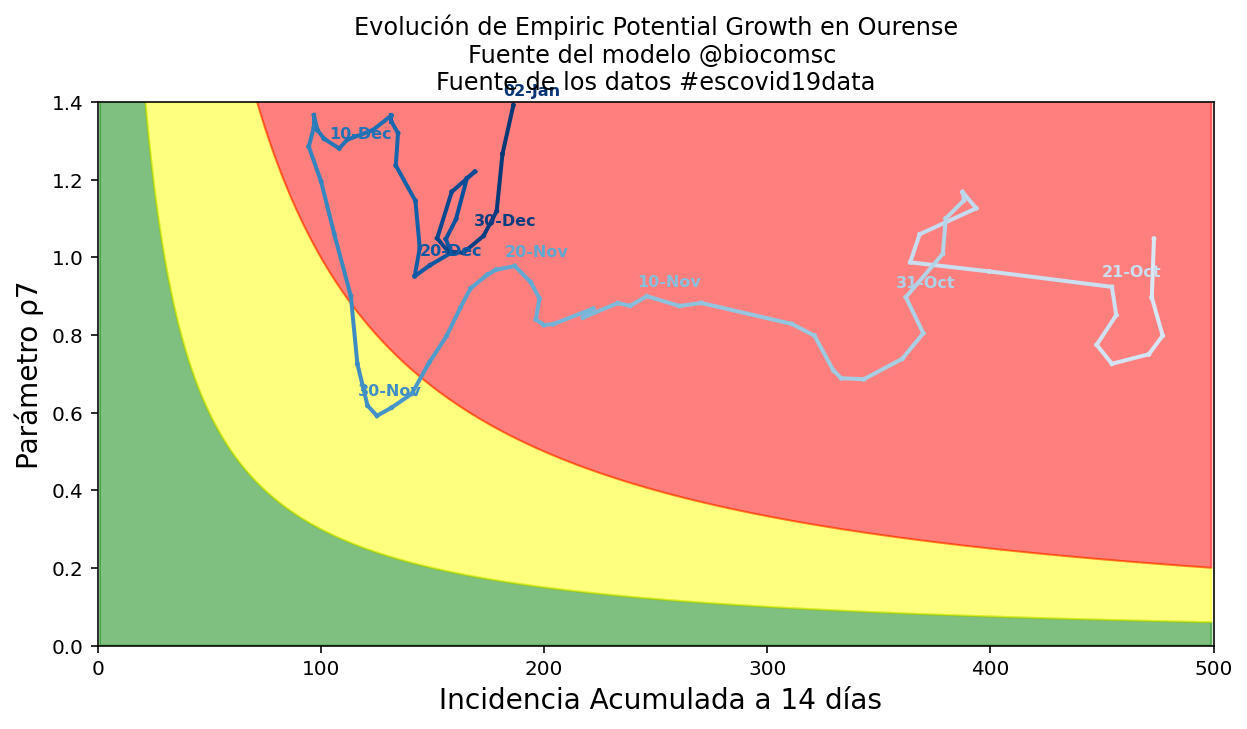

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


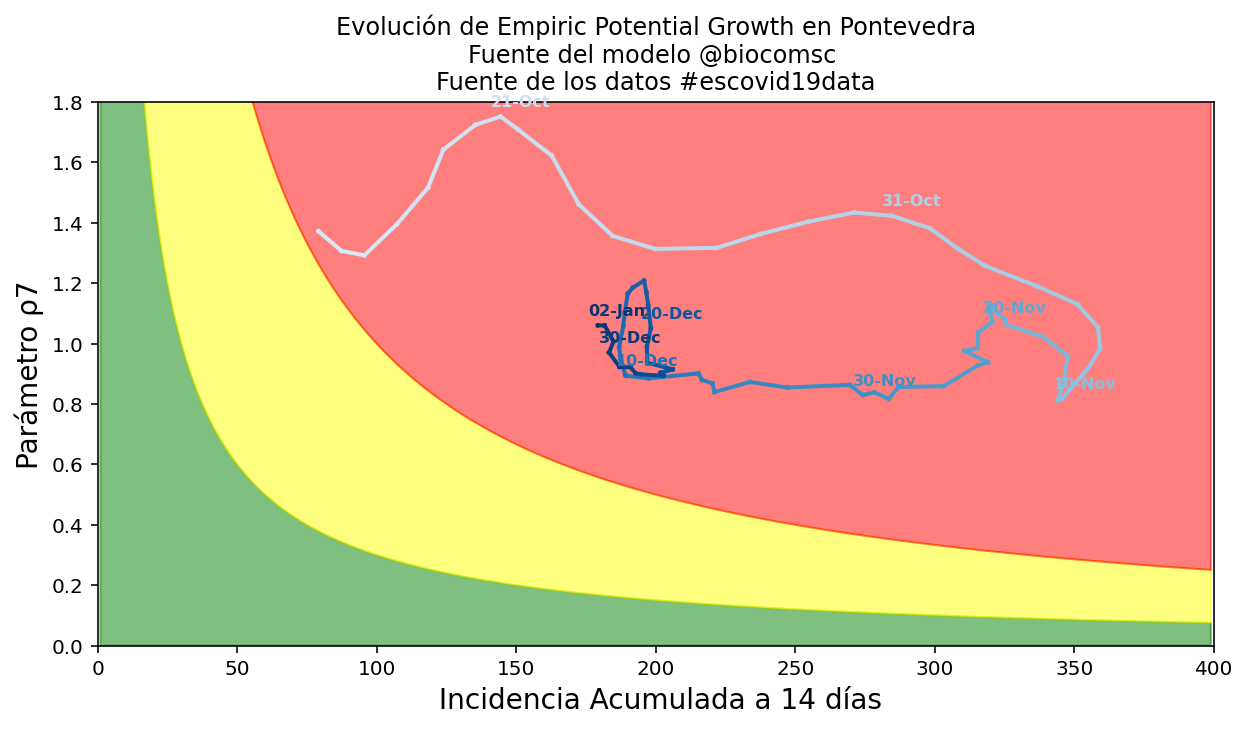

<ipython-input-283-6f28bbd23fba>:48: RuntimeWarning: divide by zero encountered in double_scalars
  valor = (datos.loc[datos['date']==fecha_actual+un_dia,campo[provincia]].values[0]+\
<ipython-input-283-6f28bbd23fba>:48: RuntimeWarning: invalid value encountered in double_scalars
  valor = (datos.loc[datos['date']==fecha_actual+un_dia,campo[provincia]].values[0]+\
<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


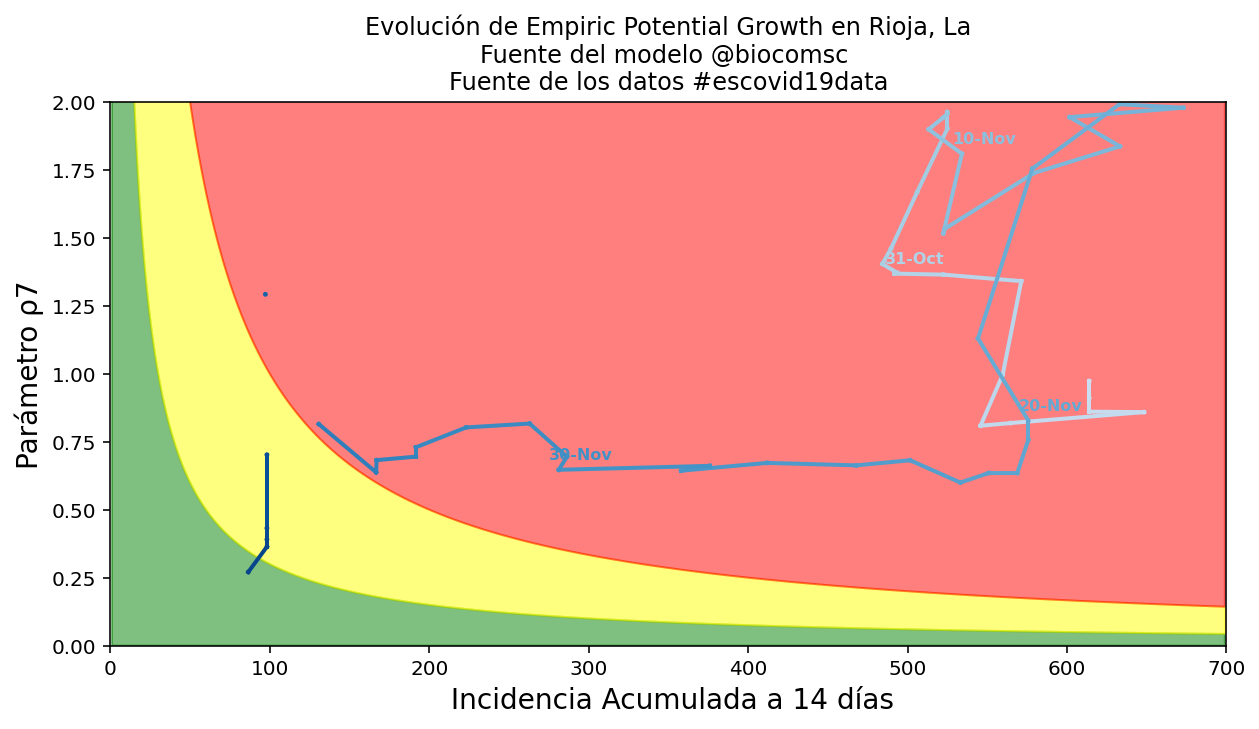

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


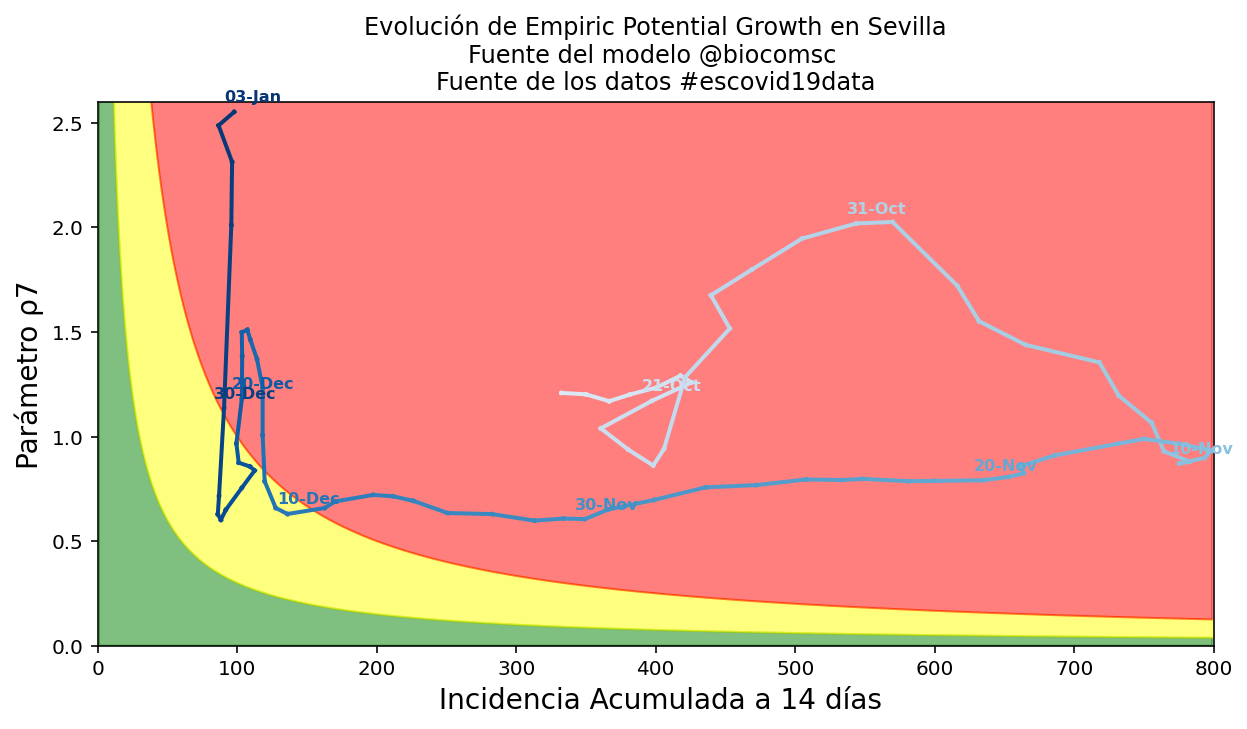

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


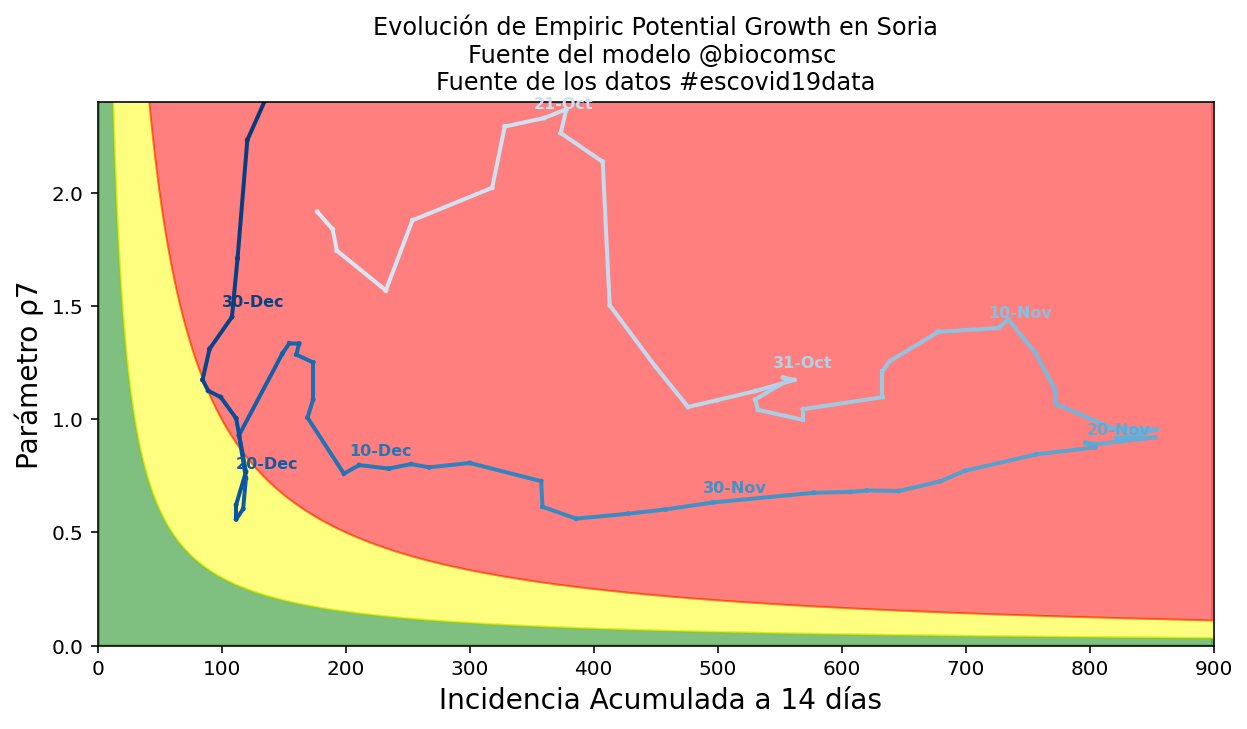

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


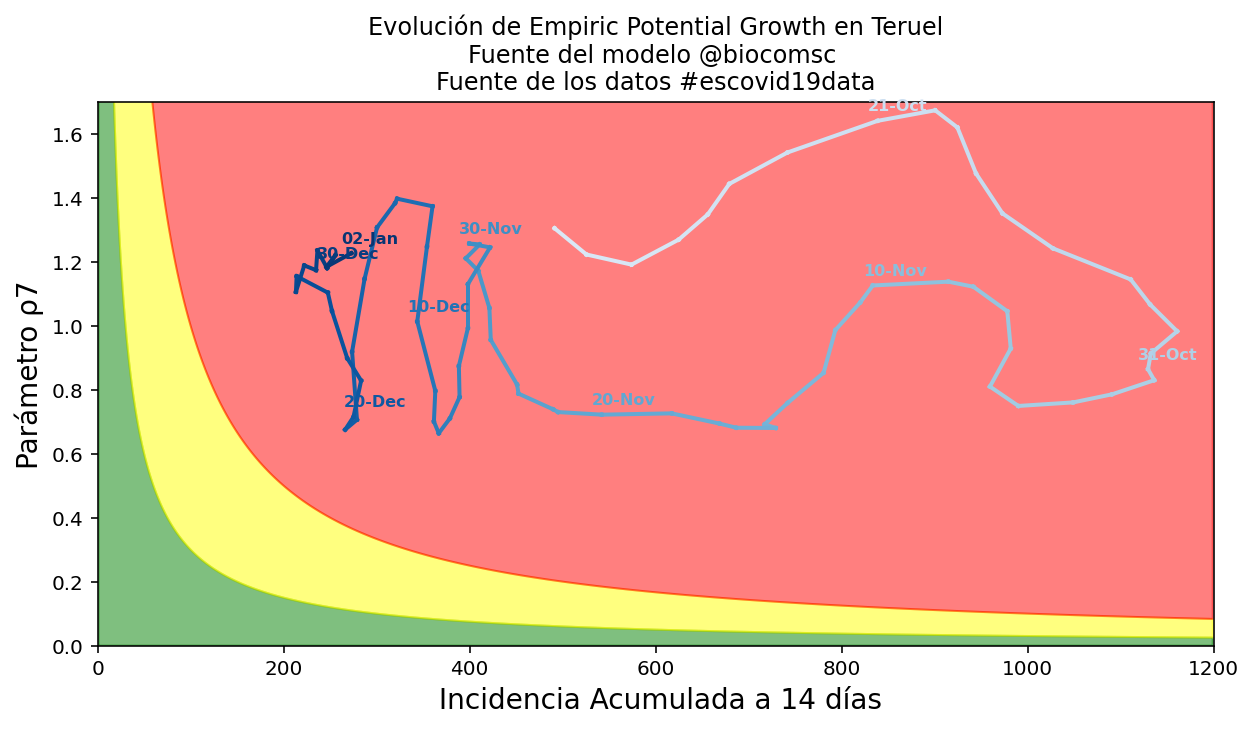

<ipython-input-283-6f28bbd23fba>:48: RuntimeWarning: divide by zero encountered in double_scalars
  valor = (datos.loc[datos['date']==fecha_actual+un_dia,campo[provincia]].values[0]+\
<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


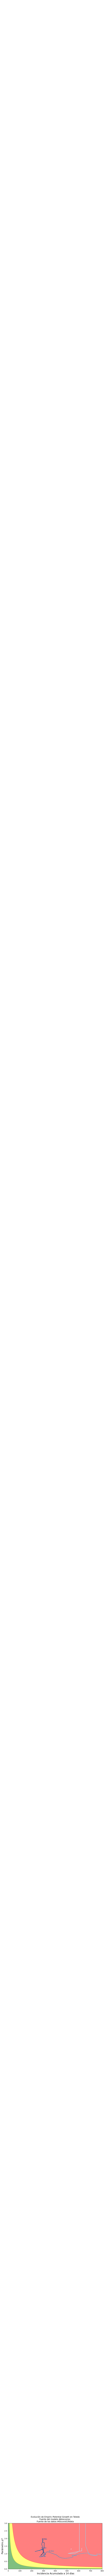

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


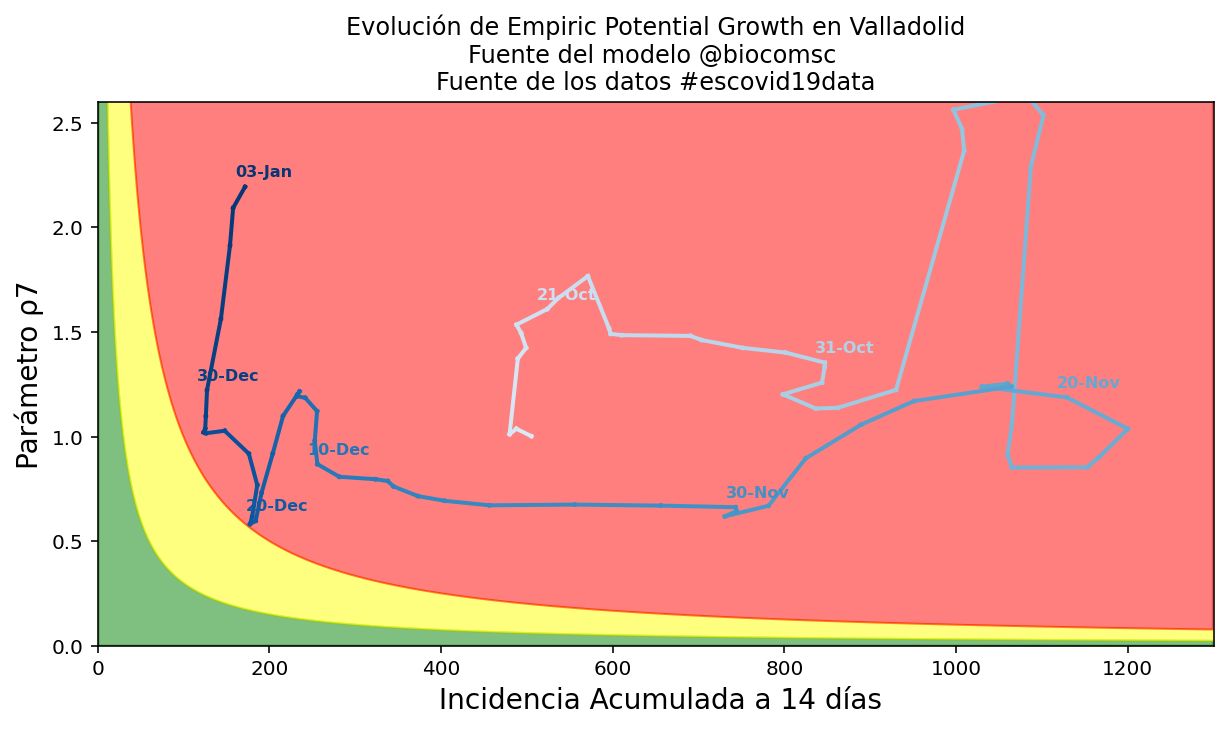

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


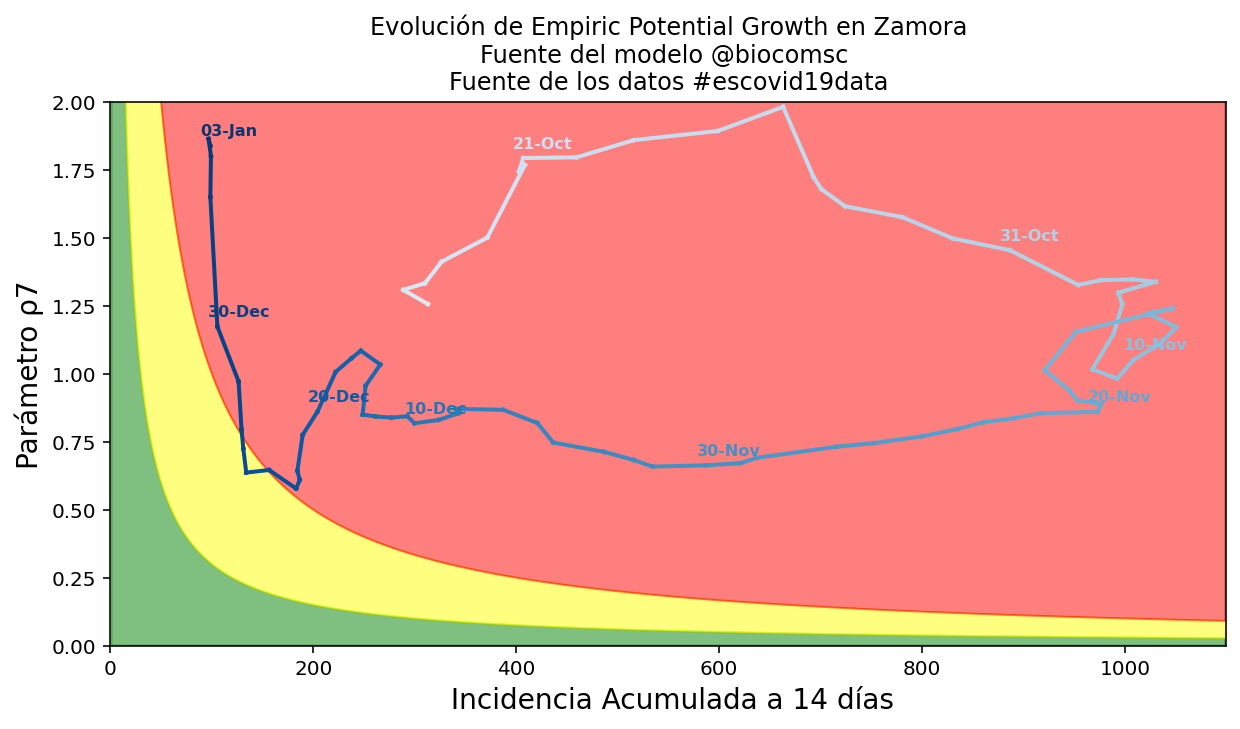

<ipython-input-283-6f28bbd23fba>:98: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 0, 30/rango,
<ipython-input-283-6f28bbd23fba>:102: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango, 30/rango, 100/rango,
<ipython-input-283-6f28bbd23fba>:106: RuntimeWarning: divide by zero encountered in true_divide
  ax.fill_between(rango,100/rango,10,


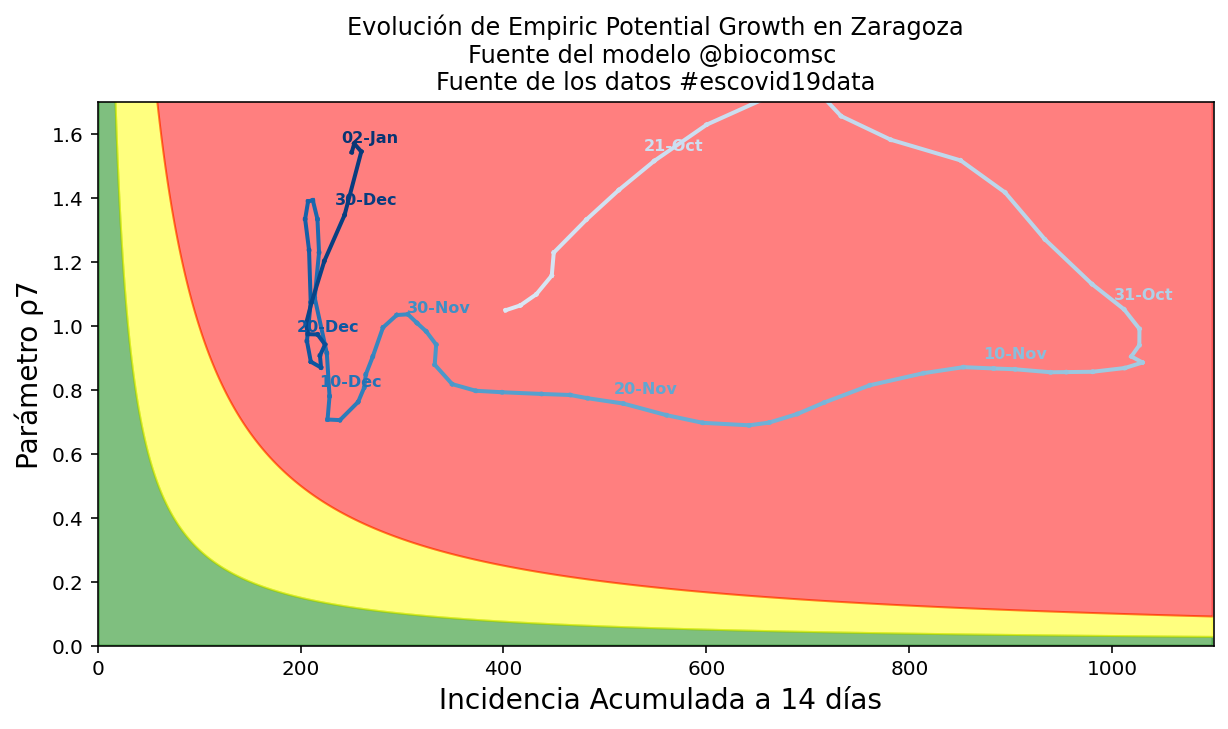

In [285]:
for provincia in df['province'].unique():
    grafico_EPG(df, provincia,desde=datetime(year=2020,month=10,day=1))